# Lien du dépot git du projet

https://github.com/Mr-Kuate/Projet_concours_Canam

# 1: PREPARATION DES DONNEES 
Bien sur, j'ai rencontré des problèmes de qualité de données durant la manipulation des données et je les ai résolu en chargeant le jeu de données et en appliquant Data Cleaning dessus
Toutes les étapes sont détaillées ci-bas

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Chargement des données
df = pd.read_csv('ks_dataset.csv', encoding='cp1252')

C:\Users\Alane Bryan\AppData\Local\Temp\ipykernel_4580\750606906.py:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ks_dataset.csv', encoding='cp1252')


In [8]:
len(df)

323750

In [9]:
df.head()

ID                                               name   \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

        category  main_category  currency             deadline   goal   \
0          Poetry     Publishing       GBP  2015-10-09 11:36:00   1000   
1  Narrative Film   Film & Video       USD  2013-02-26 00:20:50  45000   
2           Music          Music       USD  2012-04-16 04:24:11   5000   
3    Film & Video   Film & Video       USD  2015-08-29 01:00:00  19500   
4     Restaurants           Food       USD  2016-04-01 13:38:27  50000   

             launched  pledged       state  backers  country  usd pledged   \
0  2015-08-11 12:12:28        0      failed        0       GB            0   
1  2013-01-12 00:20:50      220      failed        3       US          220   
2  2012-03-17 03:24:11        1      failed        1       US            1   
3  2015-07-04 08:35:03     1283    canceled       14       US         1283   
4  2016-02-26 13:38:27    52375  successful      224       US        52375   

  Unnamed: 13 Unnamed: 14 Unnamed: 15  Unnamed: 16  
0         NaN         NaN         NaN          NaN  
1         NaN         NaN         NaN          NaN  
2         NaN         NaN         NaN          NaN  
3         NaN         NaN         NaN          NaN  
4         NaN         NaN         NaN          NaN

In [10]:
df.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [ ]:
df['Unnamed: 16'].unique()

array([nan, 25.])

In [ ]:
df['Unnamed: 13'].unique()

array([nan, '504.94765278', '3984', '525', '0', '3035', '4986.41798748',
       '590', '23924', '12306', '13675', '3.39594898', '4690', '4488.01',
       '687', '450', '11719', '126.9669968', '1495', '20', '14309.36',
       'US', '8542', '3363', '950', '1800.5', '352', '1320', '18', '2161',
       '331', '13446.90533288', '2630', '1847.3965377', '3711', '103',
       '8609.6', '312', '11044', '5600.65', '630', '1010', '178',
       '2006.0578219', '3671', '65', '5', '4451', '16', '2000',
       '566.57479307', '125', '9444.43338774', '1', '90', '765',
       '357.66549924', '1850', '166', '2107', '63', '10', '8.5104355',
       '2920.0614495', '306', '13', '321.629504', '7703', '650', '800',
       '2275.2478569', '8.26779725', '1056', '5940', '45', '7.9006665',
       '1827', '10890.45', '245', '416.29712868', '200', '44.7846084',
       '6', '797', '6126', '175', '12201', '3605.13', '1200', '325',
       '2632', '6507.05253517', '46', '708.0265863', '9430.8', '2308',
       '310', '

In [ ]:
df['Unnamed: 16'].unique()

array([nan, 25.])

Les Features Unnamed: 13, Unnamed: 14, Unnamed: 15,Unnamed: 16 semblent etre des bruits ne faisant pas parti des labels du dataset comme mentionné à l'annexe 2 de la documentation des données donc doivent etre supprimées

In [4]:
df = df.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

In [14]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')

In [5]:
#Je me suis rendu compte qu'il y a un espace à la fin de mot des différents labels ce qui serait un peu genant en travaillant
#du coup je vais supprimer ces espaces en redéfinissant une nouvelle liste de labels
columns = ['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
           'goal', 'launched', 'pledged', 'state', 'backers', 'country',
           'usd pledged']

df.columns = columns
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')

In [16]:
df.head(2)

ID                             name        category main_category  \
0  1000002330  The Songs of Adelaide & Abullah          Poetry    Publishing   
1  1000004038                   Where is Hank?  Narrative Film  Film & Video   

  currency             deadline   goal             launched pledged   state  \
0      GBP  2015-10-09 11:36:00   1000  2015-08-11 12:12:28       0  failed   
1      USD  2013-02-26 00:20:50  45000  2013-01-12 00:20:50     220  failed   

  backers country usd pledged  
0       0      GB           0  
1       3      US         220

In [17]:
#Regardons maintenant les valeurs manquantes dans l'ensemble du dataset
df.isnull().sum()

ID                  0
name                4
category            5
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged      3790
dtype: int64

In [ ]:
#Jetons à présent un coup d'oeil sur les valeurs manquantes des variables name, category, usd pledged
df[df['name'].isnull()]

ID name        category main_category currency  \
142830  1848699072  NaN  Narrative Film  Film & Video      USD   
262901   634871725  NaN     Video Games         Games      GBP   
265251   648853978  NaN  Product Design        Design      USD   
289847   796533179  NaN        Painting           Art      USD   

                   deadline    goal             launched pledged      state  \
142830  2012-02-29 15:04:00  200000  2012-01-01 12:35:31     100     failed   
262901  2013-01-06 23:00:00    2000  2012-12-19 23:57:48     196     failed   
265251  2016-07-18 05:01:47    2500  2016-06-18 05:01:47       0  suspended   
289847  2011-12-05 05:59:00   35000  2011-11-06 23:55:55     220     failed   

       backers country  usd pledged  
142830       1      US          100  
262901      12      GB  317.7284362  
265251       0      US            0  
289847       5      US          220

In [ ]:
df[df['category'].isnull()]

ID                                               name  \
36671   1218074363                                        I am Rupert   
41069    124438738                                     BlanketPals TM   
63544   1378236004            {string&&loop} Knitting Craft with Code   
96753   1574873938                         American Pin-up Revisitedd   
269930   676846639  Uplift: The Wearable iPhone Case with Zipline&...   

       category       main_category      currency deadline  \
36671       NaN           Webseries  Film & Video      GBP   
41069       NaN  Interactive Design        Design      USD   
63544       NaN             Apparel       Fashion      USD   
96753       NaN                 Art           Art      USD   
269930      NaN              Design        Design      USD   

                       goal launched              pledged     state  \
36671   2014-05-16 22:25:57     2000  2014-03-27 21:25:57         5   
41069   2015-03-25 20:51:48     9750  2015-02-23 21:51:48  10890.45   
63544   2016-05-28 00:00:00     1800  2016-04-29 21:04:40      2308   
96753   2014-04-03 17:52:09     7500  2014-03-04 17:52:09       100   
269930  2011-04-04 20:08:17    50000  2011-03-05 20:08:17      1665   

           backers country usd pledged  
36671       failed       1          GB  
41069   successful     107          US  
63544   successful     119          US  
96753       failed       1          US  
269930    canceled      10          US

In [ ]:
df[df['usd pledged'].isnull()]

ID                                               name  \
150     1000694855                      STREETFIGHTERZ WHEELIE MURICA   
287      100149523                        Duncan Woods - Chameleon EP   
549     1003023003          The Making of Ashley Kelley's Debut Album   
561     1003130892                       Butter Side Down Debut Album   
650     1003629045                            Chase Goehring debut EP   
...            ...                                                ...   
323391   997971307  EQUUS International Film Festival®, all-equine...   
323456   998319149                            Emily 2050 - Short Film   
323561     9988744                             Matthew Stephens Music   
323683   999610349     Lady Vendredi: Afrofuturist concept 12 inch EP   
323685   999621278                     Jeune auteur a besoin de vous!   

            category main_category currency             deadline  goal  \
150     Film & Video  Film & Video      USD  2014-09-20 06:59:00  6500   
287            Music         Music      AUD  2015-08-25 23:00:00  4500   
549            Music         Music      USD  2015-04-09 21:06:13  3500   
561            Music         Music      USD  2015-11-26 10:59:00  6000   
650            Music         Music      USD  2016-03-21 06:00:00  3000   
...              ...           ...      ...                  ...   ...   
323391  Film & Video  Film & Video      USD  2015-02-03 04:19:14  7500   
323456  Film & Video  Film & Video      CAD  2014-05-23 00:30:09  3000   
323561         Music         Music      USD  2016-02-05 23:00:00  5000   
323683         Music         Music      GBP  2015-10-19 22:33:18  2000   
323685    Publishing    Publishing      EUR  2015-11-20 21:28:13  1600   

                   launched  pledged      state backers country usd pledged  
150     2014-08-06 21:28:36      555  undefined       0    N,"0         NaN  
287     2015-08-04 12:05:17     4767  undefined       0    N,"0         NaN  
549     2015-03-10 20:06:13     3576  undefined       0    N,"0         NaN  
561     2015-11-02 22:09:19   7007.8  undefined       0    N,"0         NaN  
650     2016-02-23 03:09:49  3660.38  undefined       0    N,"0         NaN  
...                     ...      ...        ...     ...     ...         ...  
323391  2014-12-05 04:19:14       10  undefined       0    N,"0         NaN  
323456  2014-04-08 00:30:09     3102  undefined       0    N,"0         NaN  
323561  2016-01-06 21:59:23      235  undefined       0    N,"0         NaN  
323683  2015-09-21 22:33:18     2125  undefined       0    N,"0         NaN  
323685  2015-10-21 21:28:13        0  undefined       0    N,"0         NaN  

[3790 rows x 13 columns]

In [ ]:
100*df.isnull().sum()/len(df)

ID               0.000000
name             0.001236
category         0.001544
main_category    0.000000
currency         0.000000
deadline         0.000000
goal             0.000000
launched         0.000000
pledged          0.000000
state            0.000000
backers          0.000000
country          0.000000
usd pledged      1.170656
dtype: float64

In [6]:
# Déjà, en plus du fait que les données manquantes des labels name, category et usd pledged représente respectivement
# 0.001236%, 0.001544% et 1.170656% du dataset ce qui est très insignifiants, nous remarquons également
# que certaines données des features ne tiennent pas la route par exemple juste ci haut si je prends juste la ligne d'index 150
# nous avons un montant de 555 en monnaie locale que le projet a réalisé alors que le nombre de contributeur est nul (backers=0)
# donc au lieu de compléter ces données manquantes, je vais préférer les suprimer

df = df.dropna()

In [ ]:
#Vérifions qu'il y a encore des données manquantes
df.isnull().sum()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd pledged      0
dtype: int64

In [7]:
#Supprimons la colonne ID car elle ne nous est pas de grande utilité
df = df.drop('ID', axis=1)

In [ ]:
df.head(3)

name        category  \
0                    The Songs of Adelaide & Abullah          Poetry   
1                                     Where is Hank?  Narrative Film   
2  ToshiCapital Rekordz Needs Help to Complete Album           Music   

  main_category currency             deadline   goal             launched  \
0    Publishing      GBP  2015-10-09 11:36:00   1000  2015-08-11 12:12:28   
1  Film & Video      USD  2013-02-26 00:20:50  45000  2013-01-12 00:20:50   
2         Music      USD  2012-04-16 04:24:11   5000  2012-03-17 03:24:11   

  pledged   state backers country usd pledged  
0       0  failed       0      GB           0  
1     220  failed       3      US         220  
2       1  failed       1      US           1

In [8]:
# Rassurons nous qu'il y a pas de valeurs en double dans le dataset
df.drop_duplicates()

name         category  \
0                         The Songs of Adelaide & Abullah           Poetry   
1                                          Where is Hank?   Narrative Film   
2       ToshiCapital Rekordz Needs Help to Complete Album            Music   
3       Community Film Project: The Art of Neighborhoo...     Film & Video   
4                                    Monarch Espresso Bar      Restaurants   
...                                                   ...              ...   
323745  ChknTruk Nationwide Charity Drive 2014 (Canceled)      Documentary   
323746                                          The Tribe   Narrative Film   
323747  Walls of Remedy- New lesbian Romantic Comedy f...   Narrative Film   
323748                           BioDefense Education Kit       Technology   
323749                  Nou Renmen Ayiti!  We Love Haiti!  Performance Art   

       main_category currency             deadline   goal  \
0         Publishing      GBP  2015-10-09 11:36:00   1000   
1       Film & Video      USD  2013-02-26 00:20:50  45000   
2              Music      USD  2012-04-16 04:24:11   5000   
3       Film & Video      USD  2015-08-29 01:00:00  19500   
4               Food      USD  2016-04-01 13:38:27  50000   
...              ...      ...                  ...    ...   
323745  Film & Video      USD  2014-10-17 02:35:30  50000   
323746  Film & Video      USD  2011-07-19 03:35:14   1500   
323747  Film & Video      USD  2010-08-16 05:59:00  15000   
323748    Technology      USD  2016-02-13 02:00:00  15000   
323749           Art      USD  2011-08-16 09:07:47   2000   

                   launched pledged       state backers country usd pledged  
0       2015-08-11 12:12:28       0      failed       0      GB           0  
1       2013-01-12 00:20:50     220      failed       3      US         220  
2       2012-03-17 03:24:11       1      failed       1      US           1  
3       2015-07-04 08:35:03    1283    canceled      14      US        1283  
4       2016-02-26 13:38:27   52375  successful     224      US       52375  
...                     ...     ...         ...     ...     ...         ...  
323745  2014-09-17 02:35:30      25    canceled       1      US          25  
323746  2011-06-22 03:35:14     155      failed       5      US         155  
323747  2010-07-01 19:40:30      20      failed       1      US          20  
323748  2016-01-13 18:13:53     200      failed       6      US         200  
323749  2011-07-19 09:07:47     524      failed      17      US         524  

[319951 rows x 12 columns]

In [ ]:
# Nous avons fini avec les données manquantes maintenant attaquons les données non-compatibles pour chaque labels
#Les labels name, category, main_category semblent etre ok et à priori n'ont pas de problème de type de valeur donc
# continuons avec les autres variables, j'y reviendrai sur celles ci plus tard

df['name'].unique()

array(['The Songs of Adelaide & Abullah', 'Where is Hank?',
       'ToshiCapital Rekordz Needs Help to Complete Album', ...,
       'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!',
       'BioDefense Education Kit', 'Nou Renmen Ayiti!  We Love Haiti!'],
      dtype=object)

In [ ]:
df['main_category'].nunique()

119

In [ ]:
df['category'].nunique()

770

In [ ]:
# Regardons à présent la variable currency
df['currency'].unique()

array(['GBP', 'USD', 'CAD', 'NOK', 'AUD', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'Music', 'Food', 'Theater', 'Technology',
       'Film & Video', 'SGD', 'Games', 'Art', 'Publishing', 'Design',
       'Rock', 'Comics', 'Crafts', 'Photography', 'Journalism', 'Fashion',
       'Software', 'Dance', ' Be active!', 'Nonfiction',
       ' clothing company', 'Painting', ' tango and culture',
       ' Religion ', 'Apparel'], dtype=object)

Nous voyons clairement ci haut que de fausses monnaies sont présentes dans la variable currency et doivent etre supprimées
Ainsi dans tout l'ensemble du dataset, je garderai juste les lignes pour lesquelles les valeurs de la variable currency sont
correctes donc strictement incluses dans
l'ensemble 	 ['GBP', 'USD', 'CAD', 'NOK', 'AUD', 'EUR', 'MXN', 'SEK', 'NZD','CHF', 'DKK', 'HKD', 'SGD']
qui sont des devises réelles des monnaies

In [9]:
df = df[df.currency.isin(['GBP', 'USD', 'CAD', 'NOK', 'AUD', 'EUR', 'MXN', 'SEK', 'NZD','CHF', 'DKK', 'HKD', 'SGD'])]
df['currency'].unique()

array(['GBP', 'USD', 'CAD', 'NOK', 'AUD', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD'], dtype=object)

In [ ]:
# Pour l'uniformité de la monnaie donc des valeurs de la variable currency, j'y reviendrai plus tard
df

name         category  \
0                         The Songs of Adelaide & Abullah           Poetry   
1                                          Where is Hank?   Narrative Film   
2       ToshiCapital Rekordz Needs Help to Complete Album            Music   
3       Community Film Project: The Art of Neighborhoo...     Film & Video   
4                                    Monarch Espresso Bar      Restaurants   
...                                                   ...              ...   
323745  ChknTruk Nationwide Charity Drive 2014 (Canceled)      Documentary   
323746                                          The Tribe   Narrative Film   
323747  Walls of Remedy- New lesbian Romantic Comedy f...   Narrative Film   
323748                           BioDefense Education Kit       Technology   
323749                  Nou Renmen Ayiti!  We Love Haiti!  Performance Art   

       main_category currency             deadline   goal  \
0         Publishing      GBP  2015-10-09 11:36:00   1000   
1       Film & Video      USD  2013-02-26 00:20:50  45000   
2              Music      USD  2012-04-16 04:24:11   5000   
3       Film & Video      USD  2015-08-29 01:00:00  19500   
4               Food      USD  2016-04-01 13:38:27  50000   
...              ...      ...                  ...    ...   
323745  Film & Video      USD  2014-10-17 02:35:30  50000   
323746  Film & Video      USD  2011-07-19 03:35:14   1500   
323747  Film & Video      USD  2010-08-16 05:59:00  15000   
323748    Technology      USD  2016-02-13 02:00:00  15000   
323749           Art      USD  2011-08-16 09:07:47   2000   

                   launched pledged       state backers country usd pledged  
0       2015-08-11 12:12:28       0      failed       0      GB           0  
1       2013-01-12 00:20:50     220      failed       3      US         220  
2       2012-03-17 03:24:11       1      failed       1      US           1  
3       2015-07-04 08:35:03    1283    canceled      14      US        1283  
4       2016-02-26 13:38:27   52375  successful     224      US       52375  
...                     ...     ...         ...     ...     ...         ...  
323745  2014-09-17 02:35:30      25    canceled       1      US          25  
323746  2011-06-22 03:35:14     155      failed       5      US         155  
323747  2010-07-01 19:40:30      20      failed       1      US          20  
323748  2016-01-13 18:13:53     200      failed       6      US         200  
323749  2011-07-19 09:07:47     524      failed      17      US         524  

[319324 rows x 12 columns]

In [ ]:
df.dtypes

name             object
category         object
main_category    object
currency         object
deadline         object
goal             object
launched         object
pledged          object
state            object
backers          object
country          object
usd pledged      object
dtype: object

In [10]:
# Les variable goal, pledged et usd pledged sont de type string au lieu de float comme indiqué dans la documentation des données
# donc appliquons une fonction map à ces features pour le changement de type
#Faisons ici pareil pour la feature backers mais plutot en lui attribuant le type int
df['goal'] = df['goal'].map(lambda x: float(x))
df['pledged'] = df['pledged'].map(lambda x: float(x))
df['usd pledged'] = df['usd pledged'].map(lambda x: float(x))
df['backers'] = df['backers'].map(lambda x: int(x))
df.dtypes

name              object
category          object
main_category     object
currency          object
deadline          object
goal             float64
launched          object
pledged          float64
state             object
backers            int64
country           object
usd pledged      float64
dtype: object

In [11]:
#Faisons une comparaison entre les features pledged et usd pledged
#Il y a encore des données eronnées
# Prenons par exemple la ligne d'index 27 ci-dessous, comment se fait t-il que le montant en monnaie locale que le projet
# a réalisé à la date limite (pledged) soit différent de celui en USD que le projet a réalisé à la date limite (usd pledged)
# alors que le pays d'origine du projet est le USD ? Logiquement, Ca ne tient pas la route, ces données sont fausses
# et doivent etre nettoyées

df[df['pledged'] != df['usd pledged']].query("currency == 'USD'").query("country =='US'")

name          category  \
27                      Ledr workbook: one tough journal!    Product Design   
62      Diposta - liberating people from their postal ...               Web   
92                               Disaster Area: A Podcast  Radio & Podcasts   
93                             Titanium EDC Bottle Opener    Product Design   
103                                      Alpha Omega E.P.             Metal   
...                                                   ...               ...   
323608                                        In The Ring            Shorts   
323610          Kuña: documental sobre la mujer paraguaya       Documentary   
323629          Cotopaxi Connect—Custom Gear, Co-Designed    Product Design   
323680                        Arcane Sally & Mr. Steam #2       Comic Books   
323713                                   Green City Times               Web   

       main_category currency             deadline      goal  \
27            Design      USD  2016-10-08 02:00:00    1000.0   
62        Technology      USD  2016-08-23 13:18:36  100000.0   
92        Publishing      USD  2016-12-28 17:58:04    1000.0   
93            Design      USD  2016-11-20 16:23:31     500.0   
103            Music      USD  2016-09-30 22:34:26    1000.0   
...              ...      ...                  ...       ...   
323608  Film & Video      USD  2016-12-01 19:15:04   12000.0   
323610  Film & Video      USD  2016-08-14 00:29:00   10000.0   
323629        Design      USD  2017-01-19 08:00:35   25000.0   
323680        Comics      USD  2016-09-19 08:59:00    1500.0   
323713    Journalism      USD  2016-08-28 05:27:43    5000.0   

                   launched  pledged       state  backers country  usd pledged  
27      2016-09-07 13:14:26  47266.0  successful      549      US      11253.0  
62      2016-07-24 13:18:36    141.0      failed        3      US        100.0  
92      2016-11-28 17:58:04    125.0        live        3      US          0.0  
93      2016-10-21 16:23:31    156.0      failed        4      US          1.0  
103     2016-09-05 22:34:26    472.0      failed       13      US          0.0  
...                     ...      ...         ...      ...     ...          ...  
323608  2016-11-01 18:15:04  12206.0  successful      152      US       3676.0  
323610  2016-07-13 01:58:44  10588.0  successful      181      US        350.0  
323629  2016-11-20 08:00:35   5763.0        live      108      US       1505.0  
323680  2016-08-26 01:09:58   6771.0  successful      285      US       1617.0  
323713  2016-07-29 05:27:43     11.0      failed        3      US          0.0  

[14786 rows x 12 columns]

In [12]:
# Ainsi, nous devrions donc filtrer notre dataframe en supprimant les lignes où le variable 'currency' est egal à 'USD' et en
# meme temps où le variable 'pledged' est différente de la variable 'usd pledged'

# Nous devrions donc executer cette requete pour cela :

# delete from df where currency='USD' AND pledged != usd_pledged

# Son équivalent dans le cas d'un dataframme est ci-dessous :

df = df[(df['currency']!='USD') | (df['pledged'] == df['usd pledged'])]
df

name         category  \
0                         The Songs of Adelaide & Abullah           Poetry   
1                                          Where is Hank?   Narrative Film   
2       ToshiCapital Rekordz Needs Help to Complete Album            Music   
3       Community Film Project: The Art of Neighborhoo...     Film & Video   
4                                    Monarch Espresso Bar      Restaurants   
...                                                   ...              ...   
323745  ChknTruk Nationwide Charity Drive 2014 (Canceled)      Documentary   
323746                                          The Tribe   Narrative Film   
323747  Walls of Remedy- New lesbian Romantic Comedy f...   Narrative Film   
323748                           BioDefense Education Kit       Technology   
323749                  Nou Renmen Ayiti!  We Love Haiti!  Performance Art   

       main_category currency             deadline     goal  \
0         Publishing      GBP  2015-10-09 11:36:00   1000.0   
1       Film & Video      USD  2013-02-26 00:20:50  45000.0   
2              Music      USD  2012-04-16 04:24:11   5000.0   
3       Film & Video      USD  2015-08-29 01:00:00  19500.0   
4               Food      USD  2016-04-01 13:38:27  50000.0   
...              ...      ...                  ...      ...   
323745  Film & Video      USD  2014-10-17 02:35:30  50000.0   
323746  Film & Video      USD  2011-07-19 03:35:14   1500.0   
323747  Film & Video      USD  2010-08-16 05:59:00  15000.0   
323748    Technology      USD  2016-02-13 02:00:00  15000.0   
323749           Art      USD  2011-08-16 09:07:47   2000.0   

                   launched  pledged       state  backers country  usd pledged  
0       2015-08-11 12:12:28      0.0      failed        0      GB          0.0  
1       2013-01-12 00:20:50    220.0      failed        3      US        220.0  
2       2012-03-17 03:24:11      1.0      failed        1      US          1.0  
3       2015-07-04 08:35:03   1283.0    canceled       14      US       1283.0  
4       2016-02-26 13:38:27  52375.0  successful      224      US      52375.0  
...                     ...      ...         ...      ...     ...          ...  
323745  2014-09-17 02:35:30     25.0    canceled        1      US         25.0  
323746  2011-06-22 03:35:14    155.0      failed        5      US        155.0  
323747  2010-07-01 19:40:30     20.0      failed        1      US         20.0  
323748  2016-01-13 18:13:53    200.0      failed        6      US        200.0  
323749  2011-07-19 09:07:47    524.0      failed       17      US        524.0  

[304538 rows x 12 columns]

In [ ]:
# Verifions que la requete a réussi
df[df['pledged'] != df['usd pledged']].query("currency == 'USD'").query("country =='US'")

Empty DataFrame
Columns: [name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd pledged]
Index: []

In [ ]:
# Regardons la feature state
df['state'].unique()
# Il semble ne pas y avoir de données éronnées

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [ ]:
# Regardons la feature country
df['country'].unique()
#Il semble aussi ne pas y avoir de données eronnées

array(['GB', 'US', 'CA', 'NO', 'AU', 'IT', 'DE', 'IE', 'ES', 'MX', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG'],
      dtype=object)

In [13]:
# Regardons à présent les features deadline et launched
# Convertissons ces variables en type temps
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df.dtypes

name                     object
category                 object
main_category            object
currency                 object
deadline         datetime64[ns]
goal                    float64
launched         datetime64[ns]
pledged                 float64
state                    object
backers                   int64
country                  object
usd pledged             float64
dtype: object

Nous pouvons faire du feature engineering sur les variables deadline et launched pour en ressortir une nouvelle feature
qui est campaign duration (durée de la campagne en JOUR)

In [14]:
duration = df['deadline'] - df['launched']
df['campaign duration'] = duration.map(lambda x: str(x)).map(lambda x : x[:2]).map(lambda x: int(x))
df.head(4)

name        category  \
0                    The Songs of Adelaide & Abullah          Poetry   
1                                     Where is Hank?  Narrative Film   
2  ToshiCapital Rekordz Needs Help to Complete Album           Music   
3  Community Film Project: The Art of Neighborhoo...    Film & Video   

  main_category currency            deadline     goal            launched  \
0    Publishing      GBP 2015-10-09 11:36:00   1000.0 2015-08-11 12:12:28   
1  Film & Video      USD 2013-02-26 00:20:50  45000.0 2013-01-12 00:20:50   
2         Music      USD 2012-04-16 04:24:11   5000.0 2012-03-17 03:24:11   
3  Film & Video      USD 2015-08-29 01:00:00  19500.0 2015-07-04 08:35:03   

   pledged     state  backers country  usd pledged  campaign duration  
0      0.0    failed        0      GB          0.0                 58  
1    220.0    failed        3      US        220.0                 45  
2      1.0    failed        1      US          1.0                 30  
3   1283.0  canceled       14      US       1283.0                 55

In [ ]:
# Parcourons en détail la relation et les possibles données eronnées entre les feaures state et pledged
# Est ce que nous pouvons avoir des projets qui ont réussi du point de vue réalisation (state=successful) avec un montant en monnaie locale
#que le projet a réalisé à la date limite inférieure à celui demandé initialement par le projet ? Oui
# Ceci nous confirmes que la variable state n'est pas une variable de prédiction
df[(df['state'] =="successful") & (df['pledged'] < df['goal'])]

name        category  \
62072                                        Santa's Sled             Art   
129658  Borders of the Imagination - An Epic Sci-Fi/Fa...          Shorts   
198903                  Documentary film about Les Blank.     Documentary   
235954    Insiders/Out: Exploring Outsider Art in America             Art   
287254           TUW Ruhla Watches - Comeback of a Legend  Product Design   

       main_category currency            deadline     goal  \
62072            Art      USD 2012-08-27 15:58:00   3600.0   
129658  Film & Video      USD 2015-12-27 19:06:18  36000.0   
198903  Film & Video      USD 2010-07-18 05:59:00   8000.0   
235954           Art      USD 2010-07-08 23:39:00   2000.0   
287254        Design      EUR 2016-03-19 18:14:02  25000.0   

                  launched   pledged       state  backers country  \
62072  2012-07-26 03:31:28   3599.69  successful       64      US   
129658 2015-11-12 19:06:18  30716.00  successful      275      US   
198903 2010-06-02 22:15:38   7999.65  successful       73      US   
235954 2010-05-27 00:26:33   1999.66  successful       30      US   
287254 2016-02-08 19:14:02  24892.50  successful       90      DE   

         usd pledged  campaign duration  
62072    3599.690000                 32  
129658  30716.000000                 45  
198903   7999.650000                 45  
235954   1999.660000                 42  
287254  27778.242719                 39

In [ ]:
# ['failed', 'canceled', 'successful', 'live', 'suspended']
df[(df['state'] =="canceled") & (df['pledged'] > df['goal'])]

name        category  \
516     Spycup turns your iPhone into a hidden camera ...         Gadgets   
623     I Can't Believe It's Not Potato Salad ! (Cance...       Cookbooks   
1555    Rude Story Cards. An easy, fun & outrageous pa...  Tabletop Games   
5001                Fancy King Collection Deck (Canceled)   Playing Cards   
5060    ONEclassic2: DECT Wireless Speakers That Sound...  Product Design   
...                                                   ...             ...   
320640                     Dollar Bill Origami (Canceled)             Art   
320644                          Save the Ramzi (Canceled)           Music   
322930  The World's First Multifunctional Urban Jacket...  Product Design   
323269  CAPTAINS TABLE: A Pirate Themed Card Game (Can...  Tabletop Games   
323288          The Every Day Carry Sling Belt (Canceled)         Fashion   

       main_category currency            deadline     goal  \
516       Technology      CAD 2015-12-19 17:26:34   5000.0   
623             Food      GBP 2014-08-10 13:35:05     10.0   
1555           Games      CAD 2016-10-14 19:16:59    100.0   
5001           Games      USD 2016-04-05 23:03:33    600.0   
5060          Design      HKD 2016-11-30 16:59:00  25000.0   
...              ...      ...                 ...      ...   
320640           Art      USD 2015-02-14 02:41:13     20.0   
320644         Music      USD 2009-06-15 21:54:00   1000.0   
322930        Design      EUR 2016-08-13 10:03:37  23000.0   
323269         Games      USD 2015-05-18 08:59:00    165.0   
323288       Fashion      USD 2012-05-28 07:12:06   1000.0   

                  launched   pledged     state  backers country   usd pledged  \
516    2015-11-19 17:26:34    6672.0  canceled      115      CA   5006.565851   
623    2014-07-11 13:35:05      12.0  canceled        3      GB     20.586898   
1555   2016-08-15 19:16:59     121.0  canceled        4      CA    165.993814   
5001   2016-03-11 23:03:33    1326.0  canceled       36      US   1326.000000   
5060   2016-11-07 04:05:20  104820.0  canceled       18      HK   5085.360470   
...                    ...       ...       ...      ...     ...           ...   
320640 2015-01-15 02:41:13      22.0  canceled        3      US     22.000000   
320644 2009-05-14 22:27:25    1190.0  canceled       18      US   1190.000000   
322930 2016-06-21 10:03:37   23192.0  canceled       74      IT  26339.011537   
323269 2015-04-10 18:08:19     374.0  canceled       15      US    374.000000   
323288 2012-04-28 07:12:06    1358.0  canceled       35      US   1358.000000   

        campaign duration  
516                    30  
623                    30  
1555                   60  
5001                   25  
5060                   23  
...                   ...  
320640                 30  
320644                 31  
322930                 53  
323269                 37  
323288                 30  

[429 rows x 13 columns]

In [ ]:
df[(df['state'] =="failed") & (df['pledged'] > df['goal'])]

name         category  \
14437                                          "Balance"             Jazz   
50150   Music Empowers - A Day with the Accende Ensemble  Classical Music   
185267          The new face of Canadian Science Fiction          Fiction   
255862                    Key Wrench - Unlock Your Life!   Product Design   

       main_category currency            deadline     goal  \
14437          Music      USD 2013-04-04 10:55:56  23000.0   
50150          Music      USD 2012-01-04 21:32:00   3000.0   
185267    Publishing      USD 2010-05-16 05:59:00  10000.0   
255862        Design      USD 2013-10-04 05:42:10   6000.0   

                  launched   pledged   state  backers country  usd pledged  \
14437  2013-03-05 10:55:56  23020.01  failed      141      US     23020.01   
50150  2011-11-07 15:20:24   3087.50  failed       20      US      3087.50   
185267 2010-03-18 04:35:31  10797.00  failed       66      US     10797.00   
255862 2013-08-24 05:42:10   6183.00  failed      208      US      6183.00   

        campaign duration  
14437                  30  
50150                  58  
185267                 59  
255862                 41

In [ ]:
df[(df['state'] =="live") & (df['pledged'] > df['goal'])]

name          category  \
174     APP - CUSTOM SHOES/ Calzado Personalizado - MA...              Apps   
179                 Strawberry Fields Café and Patisserie              Food   
187     CLOTHING LABEL WITH A 90's STATE OF MIND - MAD...           Apparel   
452     New Abstract artist. If you love art this is f...          Painting   
459     Lampenschirme und Objekte aus französischer Ha...        Embroidery   
...                                                   ...               ...   
323369  Green Ambassador | Your intelligent, sustainab...    Product Design   
323500                                      Record Studio  Electronic Music   
323628             NUJU -diseño en madera/design in wood-            Design   
323657                                  Stepped recliners            Crafts   
323705                 Parti Bash Mobile App & Technology              Apps   

       main_category currency            deadline      goal  \
174       Technology      MXN 2016-12-21 06:59:00   55000.0   
179             Food      CAD 2017-01-23 17:14:00   50000.0   
187          Fashion      EUR 2016-12-18 18:51:27    3286.0   
452              Art      GBP 2017-01-06 10:48:07   10000.0   
459           Crafts      EUR 2016-12-31 20:39:18    3500.0   
...              ...      ...                 ...       ...   
323369        Design      CHF 2016-12-30 19:53:45   35000.0   
323500         Music      EUR 2017-01-31 13:14:00   15000.0   
323628        Design      MXN 2017-01-14 23:20:13  100000.0   
323657        Crafts      CAD 2016-12-30 23:16:50    7500.0   
323705    Technology      USD 2017-01-07 23:40:40   25000.0   

                  launched  pledged state  backers country  usd pledged  \
174    2016-11-19 04:05:23   1700.0  live        7      MX     2.450925   
179    2016-12-01 21:16:27      0.0  live        0      CA     0.000000   
187    2016-11-18 18:51:27   2866.0  live       32      FR   427.944796   
452    2016-12-02 10:48:07      0.0  live        0      GB     0.000000   
459    2016-12-01 20:39:18      0.0  live        0      AT     0.000000   
...                    ...      ...   ...      ...     ...          ...   
323369 2016-11-30 19:53:45   3660.0  live       10      CH  3678.483386   
323500 2016-12-03 16:12:05      0.0  live        0      DE     0.000000   
323628 2016-11-30 23:20:13  65200.0  live       43      MX  2774.097322   
323657 2016-11-30 23:16:50    115.0  live        2      CA    11.161744   
323705 2016-11-08 23:40:40     70.0  live        1      US    70.000000   

        campaign duration  
174                    32  
179                    52  
187                    30  
452                    35  
459                    30  
...                   ...  
323369                 30  
323500                 58  
323628                 45  
323657                 30  
323705                 60  

[2212 rows x 13 columns]

In [ ]:
# ['failed', 'canceled', 'successful', 'live', 'suspended']
df[(df['state'] =="suspended") & (df['pledged'] > df['goal'])]

name        category  \
329     DotPen : Redefines drawing and writing for sma...  Product Design   
961         Masters of the Tooniverse Podcast (Suspended)       Webseries   
4460    HopFuse: The Ultimate Portable Beer/Tea/Water ...  Product Design   
5757    Koze - Lightweight, Inflatable, and Amazing Co...  Product Design   
6687                               JiffyLight (Suspended)         Gadgets   
...                                                   ...             ...   
319489  The best travel companion for your everyday pe...         Gadgets   
320632  Chappie OST Listening Party 12 Hr #TheChappeni...   Installations   
321059   Custom Hand-made 3-Strand Bracelets! (Suspended)         Fashion   
321531                  What awaits in Austin (Suspended)      Photobooks   
322738  UsBidi - The World's Most Intelligent Charger ...         Gadgets   

       main_category currency            deadline     goal  \
329           Design      USD 2014-08-09 21:17:10  25000.0   
961     Film & Video      USD 2013-07-02 04:30:00   3200.0   
4460          Design      USD 2015-10-29 20:11:02   1500.0   
5757          Design      USD 2016-06-12 00:43:48   4000.0   
6687      Technology      USD 2015-03-15 01:58:07   1000.0   
...              ...      ...                 ...      ...   
319489    Technology      USD 2015-09-08 09:00:00  10000.0   
320632           Art      USD 2015-04-01 10:20:00     11.0   
321059       Fashion      USD 2014-03-10 21:32:22    200.0   
321531   Photography      USD 2015-03-15 01:16:21    500.0   
322738    Technology      AUD 2015-12-04 15:33:54  35000.0   

                  launched    pledged      state  backers country  \
329    2014-06-30 21:17:10   39693.00  suspended      647      US   
961    2013-05-30 19:24:22    3226.00  suspended       24      US   
4460   2015-09-14 21:11:02    3320.00  suspended       77      US   
5757   2016-04-13 00:43:48  132536.00  suspended     1806      US   
6687   2015-02-13 02:58:07    1384.00  suspended       58      US   
...                    ...        ...        ...      ...     ...   
319489 2015-08-05 06:55:40   33840.00  suspended      268      US   
320632 2015-03-26 06:49:04      12.00  suspended        2      US   
321059 2014-02-10 22:32:22     260.00  suspended        6      US   
321531 2015-02-13 02:16:21    1000.00  suspended        1      US   
322738 2015-10-20 15:33:54  501964.79  suspended     8180      AU   

          usd pledged  campaign duration  
329      39693.000000                 40  
961       3226.000000                 32  
4460      3320.000000                 44  
5757    132536.000000                 60  
6687      1384.000000                 29  
...               ...                ...  
319489   33840.000000                 34  
320632      12.000000                  6  
321059     260.000000                 27  
321531    1000.000000                 29  
322738  365230.785919                 45  

[198 rows x 13 columns]

In [15]:
# Supprimons les colonnes deadline et launched car elles ne nous serviront plus
df = df.drop(['launched', 'deadline'], axis=1)

In [ ]:
df

name         category  \
0                         The Songs of Adelaide & Abullah           Poetry   
1                                          Where is Hank?   Narrative Film   
2       ToshiCapital Rekordz Needs Help to Complete Album            Music   
3       Community Film Project: The Art of Neighborhoo...     Film & Video   
4                                    Monarch Espresso Bar      Restaurants   
...                                                   ...              ...   
323745  ChknTruk Nationwide Charity Drive 2014 (Canceled)      Documentary   
323746                                          The Tribe   Narrative Film   
323747  Walls of Remedy- New lesbian Romantic Comedy f...   Narrative Film   
323748                           BioDefense Education Kit       Technology   
323749                  Nou Renmen Ayiti!  We Love Haiti!  Performance Art   

       main_category currency     goal  pledged       state  backers country  \
0         Publishing      GBP   1000.0      0.0      failed        0      GB   
1       Film & Video      USD  45000.0    220.0      failed        3      US   
2              Music      USD   5000.0      1.0      failed        1      US   
3       Film & Video      USD  19500.0   1283.0    canceled       14      US   
4               Food      USD  50000.0  52375.0  successful      224      US   
...              ...      ...      ...      ...         ...      ...     ...   
323745  Film & Video      USD  50000.0     25.0    canceled        1      US   
323746  Film & Video      USD   1500.0    155.0      failed        5      US   
323747  Film & Video      USD  15000.0     20.0      failed        1      US   
323748    Technology      USD  15000.0    200.0      failed        6      US   
323749           Art      USD   2000.0    524.0      failed       17      US   

        usd pledged  campaign duration  
0               0.0                 58  
1             220.0                 45  
2               1.0                 30  
3            1283.0                 55  
4           52375.0                 35  
...             ...                ...  
323745         25.0                 30  
323746        155.0                 27  
323747         20.0                 45  
323748        200.0                 30  
323749        524.0                 28  

[304538 rows x 11 columns]

Regardons à présent les features name, main_category et category

In [ ]:
df['name'].nunique()
# Pour des campagnes, je ne pense que pas que les noms des projets soient très importants pour les garder
# De plus il y a beaucoup trop de noms pour essayer de les transformer en features de variables dummies,

302693

In [ ]:
# supprimons la colonne name
df = df.drop('name', axis=1)

In [ ]:
df['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [ ]:
df['main_category'].nunique()
# La colonne main_category (categorie principale semble etre exploitable et pourra etre transformée en feature de variable
# dummies plus tard)

15

In [ ]:
df['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Design', 'Comic Books',
       'Art Books', 'Fashion', 'Theater', 'Comics', 'DIY', 'Webseries',
       'Food Trucks', 'Public Art', 'Illustration', 'Photography', 'Pop',
       'Tabletop Games', 'Art', 'Family', 'Fiction', 'Accessories',
       'Rock', 'Hardware', 'Weaving', 'Gadgets', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Apps', 'Cookbooks', 'Apparel', 'Hip-Hop',
       'Periodicals', 'Dance', 'Technology', 'Painting', 'Software',
       'Web', 'World Music', 'Photobooks', 'Drama', 'Architecture',
       'Young Adult', 'Mobile Games', 'Flight', 'Fine Art', 'Action',
       'Playing Cards', 'Makerspaces', 'Punk', "Children's Books",
       'People', 'Ceramics', 'Fabrication Tools', 'Comedy',
       'Performances',

CONCENTRONS NOUS UN PEU SUR LA VARIABLE CATEGORY ET VOYONS S'IL Y A DES DONNEES A NETTOYER

In [ ]:
df['category'].nunique()

158

In [25]:
# Regardons s'il y a des projets pour lesquels la categorie est égale à la sous-catégorie
df[df['main_category'] == df['category']]

name      category  \
2       ToshiCapital Rekordz Needs Help to Complete Album         Music   
3       Community Film Project: The Art of Neighborhoo...  Film & Video   
5       Support Solar Roasted Coffee & Green Energy!  ...          Food   
11                                     The Cottage Market        Crafts   
12      G-Spot Place for Gamers to connect with eachot...         Games   
...                                                   ...           ...   
323707                   Traverse City Dance Project 2012         Dance   
323719                               Competition Finalist       Fashion   
323727                                      Transcaucasia   Photography   
323736        The Chronicles of Erinoth - A Graphic Novel        Comics   
323748                           BioDefense Education Kit    Technology   

       main_category currency      goal  pledged       state  backers country  \
2              Music      USD    5000.0      1.0      failed        1      US   
3       Film & Video      USD   19500.0   1283.0    canceled       14      US   
5               Food      USD    1000.0   1205.0  successful       16      US   
11            Crafts      USD    5000.0      0.0      failed        0      US   
12             Games      USD  200000.0      0.0      failed        0      US   
...              ...      ...       ...      ...         ...      ...     ...   
323707         Dance      USD    7000.0   7120.0  successful       75      US   
323719       Fashion      USD    4000.0   4005.0  successful       14      US   
323727   Photography      USD    4000.0   3531.0      failed       37      US   
323736        Comics      GBP   16000.0   2738.0      failed       38      GB   
323748    Technology      USD   15000.0    200.0      failed        6      US   

        usd pledged  campaign duration  
2          1.000000                 30  
3       1283.000000                 55  
5       1205.000000                 20  
11         0.000000                 30  
12         0.000000                 44  
...             ...                ...  
323707  7120.000000                 40  
323719  4005.000000                 30  
323727  3531.000000                 61  
323736  4281.148573                 30  
323748   200.000000                 30  

[86310 rows x 11 columns]

Ceci ne tient pas la route, car dans un contexte vrai, aucun backers ne peut soutenir un projet où il n'a pas de réelles connaissances sur ses déterminants. En d'autres termes, les projets où la sous-catégorie (description précise de la catégorie principale) n'est pas précisée semblent etre des données fausses. Ainsi ces données seront supprimons

In [16]:
df = df[df['main_category'] != df['category']]
df

name         category  \
0                         The Songs of Adelaide & Abullah           Poetry   
1                                          Where is Hank?   Narrative Film   
4                                    Monarch Espresso Bar      Restaurants   
6       Chaser Strips. Our Strips make Shots their B*tch!           Drinks   
7       SPIN - Premium Retractable In-Ear Headphones w...   Product Design   
...                                                   ...              ...   
323744                         Angela's Poetry (Canceled)           Poetry   
323745  ChknTruk Nationwide Charity Drive 2014 (Canceled)      Documentary   
323746                                          The Tribe   Narrative Film   
323747  Walls of Remedy- New lesbian Romantic Comedy f...   Narrative Film   
323749                  Nou Renmen Ayiti!  We Love Haiti!  Performance Art   

       main_category currency      goal  pledged       state  backers country  \
0         Publishing      GBP    1000.0      0.0      failed        0      GB   
1       Film & Video      USD   45000.0    220.0      failed        3      US   
4               Food      USD   50000.0  52375.0  successful      224      US   
6               Food      USD   25000.0    453.0      failed       40      US   
7             Design      USD  125000.0   8233.0    canceled       58      US   
...              ...      ...       ...      ...         ...      ...     ...   
323744    Publishing      CAD    5500.0      0.0    canceled        0      CA   
323745  Film & Video      USD   50000.0     25.0    canceled        1      US   
323746  Film & Video      USD    1500.0    155.0      failed        5      US   
323747  Film & Video      USD   15000.0     20.0      failed        1      US   
323749           Art      USD    2000.0    524.0      failed       17      US   

        usd pledged  campaign duration  
0               0.0                 58  
1             220.0                 45  
4           52375.0                 35  
6             453.0                 44  
7            8233.0                 35  
...             ...                ...  
323744          0.0                 45  
323745         25.0                 30  
323746        155.0                 27  
323747         20.0                 45  
323749        524.0                 28  

[221093 rows x 11 columns]

In [ ]:
# Vérifions s'il y a plus de valeur de sous-categorie égale à la valeur de sa catégorie principale
df[df['main_category'] == df['category']]

Empty DataFrame
Columns: [category, main_category, currency, goal, pledged, state, backers, country, usd pledged, campaign duration]
Index: []

In [ ]:
df

category main_category currency      goal  pledged       state  \
0                Poetry    Publishing      GBP    1000.0      0.0      failed   
1        Narrative Film  Film & Video      USD   45000.0    220.0      failed   
4           Restaurants          Food      USD   50000.0  52375.0  successful   
6                Drinks          Food      USD   25000.0    453.0      failed   
7        Product Design        Design      USD  125000.0   8233.0    canceled   
...                 ...           ...      ...       ...      ...         ...   
323744           Poetry    Publishing      CAD    5500.0      0.0    canceled   
323745      Documentary  Film & Video      USD   50000.0     25.0    canceled   
323746   Narrative Film  Film & Video      USD    1500.0    155.0      failed   
323747   Narrative Film  Film & Video      USD   15000.0     20.0      failed   
323749  Performance Art           Art      USD    2000.0    524.0      failed   

        backers country  usd pledged  campaign duration  
0             0      GB          0.0                 58  
1             3      US        220.0                 45  
4           224      US      52375.0                 35  
6            40      US        453.0                 44  
7            58      US       8233.0                 35  
...         ...     ...          ...                ...  
323744        0      CA          0.0                 45  
323745        1      US         25.0                 30  
323746        5      US        155.0                 27  
323747        1      US         20.0                 45  
323749       17      US        524.0                 28  

[221093 rows x 10 columns]

# Bien que l'objectif de financement puisse etre atteint, il y a aucune garantie de succès ultime du projet. Je pense que dans notre contexte, l'objectif principal des promoteurs est justement que la campagne réussisse c'est-à-dire que les contributions à la date limite soient superieures ou égales au montant du projet initialement demandé. Si après avoir collecter les fonds, le projet reussi, echoue, est suspendu... Ceci fera parti des circonstances ultérieures donc pour ce dataset, tous les projets ayant au moins atteint leur objectif de financement seront considérés comme réussi du point de vue campagne. Ainsi, la variable state dans notre contexte ne nous servira que pour l'analyse exploratoire plus tard


Faisons une feature engineering sur les variables pledged et goal de telle sorte qu'on puisse avoir une nouvelle
feature (campaign state) qui déterminera si la campagne d'un projet a réussi ou non

In [17]:
determinant = df['pledged'] - df['goal']
df['campaign state'] = determinant >= 0
df['campaign state'] = df['campaign state'].map({False:'failed',True:'successful'})
df

name         category  \
0                         The Songs of Adelaide & Abullah           Poetry   
1                                          Where is Hank?   Narrative Film   
4                                    Monarch Espresso Bar      Restaurants   
6       Chaser Strips. Our Strips make Shots their B*tch!           Drinks   
7       SPIN - Premium Retractable In-Ear Headphones w...   Product Design   
...                                                   ...              ...   
323744                         Angela's Poetry (Canceled)           Poetry   
323745  ChknTruk Nationwide Charity Drive 2014 (Canceled)      Documentary   
323746                                          The Tribe   Narrative Film   
323747  Walls of Remedy- New lesbian Romantic Comedy f...   Narrative Film   
323749                  Nou Renmen Ayiti!  We Love Haiti!  Performance Art   

       main_category currency      goal  pledged       state  backers country  \
0         Publishing      GBP    1000.0      0.0      failed        0      GB   
1       Film & Video      USD   45000.0    220.0      failed        3      US   
4               Food      USD   50000.0  52375.0  successful      224      US   
6               Food      USD   25000.0    453.0      failed       40      US   
7             Design      USD  125000.0   8233.0    canceled       58      US   
...              ...      ...       ...      ...         ...      ...     ...   
323744    Publishing      CAD    5500.0      0.0    canceled        0      CA   
323745  Film & Video      USD   50000.0     25.0    canceled        1      US   
323746  Film & Video      USD    1500.0    155.0      failed        5      US   
323747  Film & Video      USD   15000.0     20.0      failed        1      US   
323749           Art      USD    2000.0    524.0      failed       17      US   

        usd pledged  campaign duration campaign state  
0               0.0                 58         failed  
1             220.0                 45         failed  
4           52375.0                 35     successful  
6             453.0                 44         failed  
7            8233.0                 35         failed  
...             ...                ...            ...  
323744          0.0                 45         failed  
323745         25.0                 30         failed  
323746        155.0                 27         failed  
323747         20.0                 45         failed  
323749        524.0                 28         failed  

[221093 rows x 12 columns]

In [ ]:
df['currency'].unique()

array(['GBP', 'USD', 'CAD', 'NOK', 'AUD', 'EUR', 'MXN', 'NZD', 'CHF',
       'DKK', 'SEK', 'HKD', 'SGD'], dtype=object)

In [ ]:
df[(df['campaign state'] == 'failed') & (df['state'] == 'successful')]
# Nous avons ici des projets (5) qui ont presque atteint leur objectif de financement et ont réussi dans la réalisation

category main_category currency     goal   pledged       state  \
129658          Shorts  Film & Video      USD  36000.0  30716.00  successful   
198903     Documentary  Film & Video      USD   8000.0   7999.65  successful   
287254  Product Design        Design      EUR  25000.0  24892.50  successful   

        backers country   usd pledged  campaign duration campaign state  
129658      275      US  30716.000000                 45         failed  
198903       73      US   7999.650000                 45         failed  
287254       90      DE  27778.242719                 39         failed

In [18]:
# Nous pourrions transformer et laisser ces données si elles étaient importantes, mais elles sont peu
# Supprimons ces données qui semblent fausses
df = df[(df['campaign state'] != 'failed') | (df['state'] != 'successful')]
# Verifions que nous les avons bien nettoyé
df[(df['campaign state'] == 'failed') & (df['state'] == 'successful')]

Empty DataFrame
Columns: [name, category, main_category, currency, goal, pledged, state, backers, country, usd pledged, campaign duration, campaign state]
Index: []

# Analyse exploratoire des données

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221090 entries, 0 to 323749
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   category           221090 non-null  object 
 1   main_category      221090 non-null  object 
 2   currency           221090 non-null  object 
 3   goal               221090 non-null  float64
 4   pledged            221090 non-null  float64
 5   state              221090 non-null  object 
 6   backers            221090 non-null  int64  
 7   country            221090 non-null  object 
 8   usd pledged        221090 non-null  float64
 9   campaign duration  221090 non-null  int64  
 10  campaign state     221090 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 20.2+ MB


Puisque nous allons tenter de prédire l'etat de la campagne, créeons un graphique de comptage

<Axes: xlabel='campaign state', ylabel='count'>

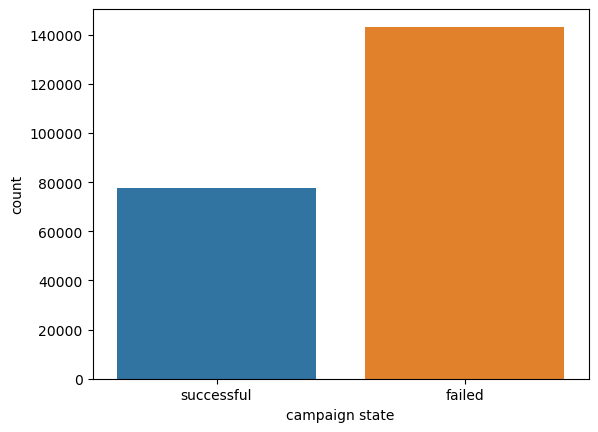

In [ ]:
order = ['successful', 'failed']
sns.countplot(x='campaign state', order=order, data=df)

Examinons la corrélation entre les variables de features continues. Calculons la corrélation entre toutes les variables numériques continues

In [ ]:
df.corr()

C:\Users\Alane Bryan\AppData\Local\Temp\ipykernel_11092\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


goal   pledged   backers  usd pledged  \
goal               1.000000  0.008000  0.006492     0.007315   
pledged            0.008000  1.000000  0.755095     0.977551   
backers            0.006492  0.755095  1.000000     0.770120   
usd pledged        0.007315  0.977551  0.770120     1.000000   
campaign duration  0.019002  0.003889 -0.004745     0.004061   

                   campaign duration  
goal                        0.019002  
pledged                     0.003889  
backers                    -0.004745  
usd pledged                 0.004061  
campaign duration           1.000000

Visualisons ceci à l'aide d'une carte de chaleur (heatmap)

C:\Users\Alane Bryan\AppData\Local\Temp\ipykernel_11092\3592724115.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


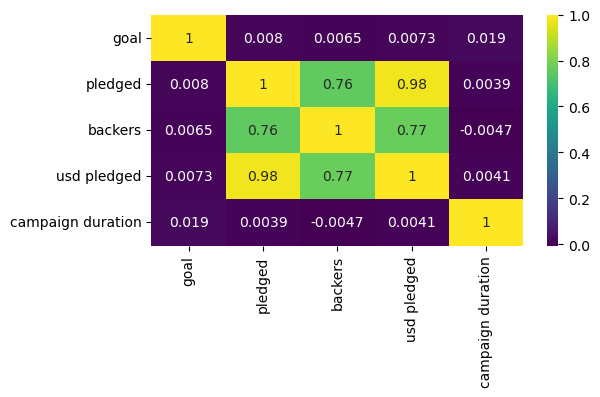

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.ylim(5,0);

Nous voyons que les features pledged et usd pledged sont presque parfaitement correlées, logique il y a une relation arithmétique entre elles et aussi une corrélation forte entre les contributeurs et les contributions, une fois de plus c'est logique car sans les contributeurs, pas de contributions

# 2.1 : INSIGHTS ET CARACTERISTIQUES

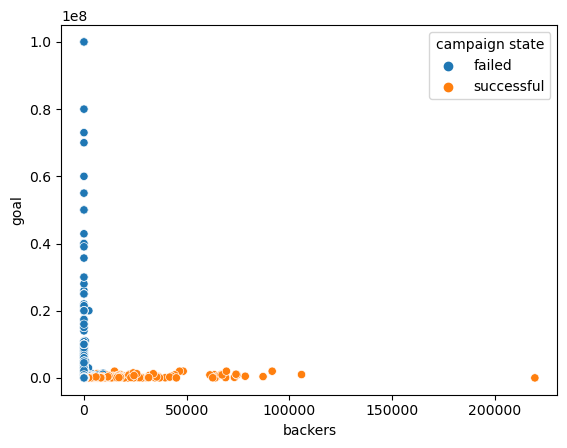

In [ ]:
# Graphique de nuage de points entre les features backers et goal
sns.scatterplot(x='backers', y='goal',data=df, hue='campaign state');

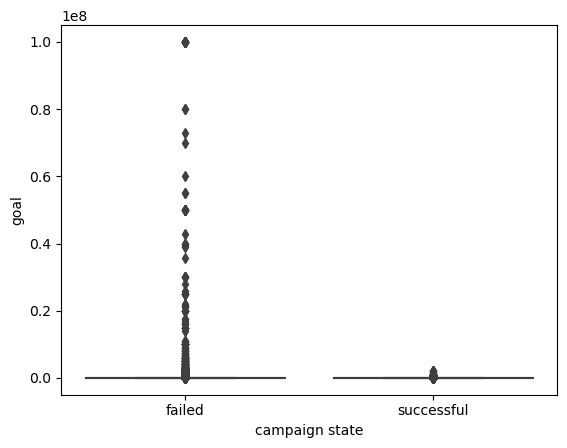

In [ ]:
# Diagramme en boîtes (boxplot) montrant la relation entre le statut de la campagne (campaign state)
# et l'objectif de financement goal
sns.boxplot(x='campaign state', y='goal',data=df);


# PREMIER INSIGHT

Nous voyons clairement que les projets ayant des objectifs de financement (goal) plus bas tendent à avoir beaucoup de contributeurs et qui dit plus de contributeurs dit une plus grande probabilité de réussite. Les promoteurs de projet pourront lancer des campagnes pour des projets à objectifs de financement (goal) bas

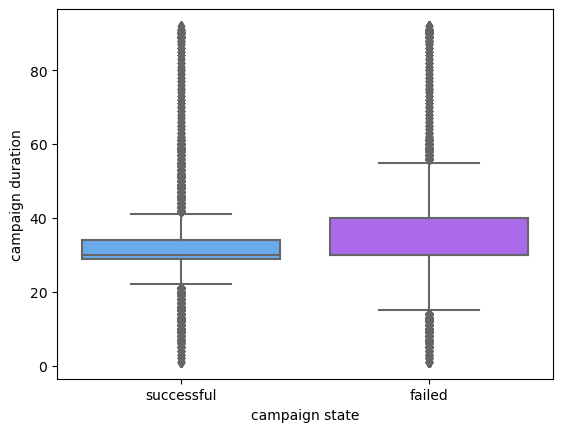

In [ ]:
# Diagramme en boîtes (boxplot) montrant la relation entre le statut de la campagne (campaign state)
# et la durée de la campagne
order = ['successful', 'failed']
sns.boxplot(x='campaign state', y='campaign duration', order=order, data=df, palette='cool');

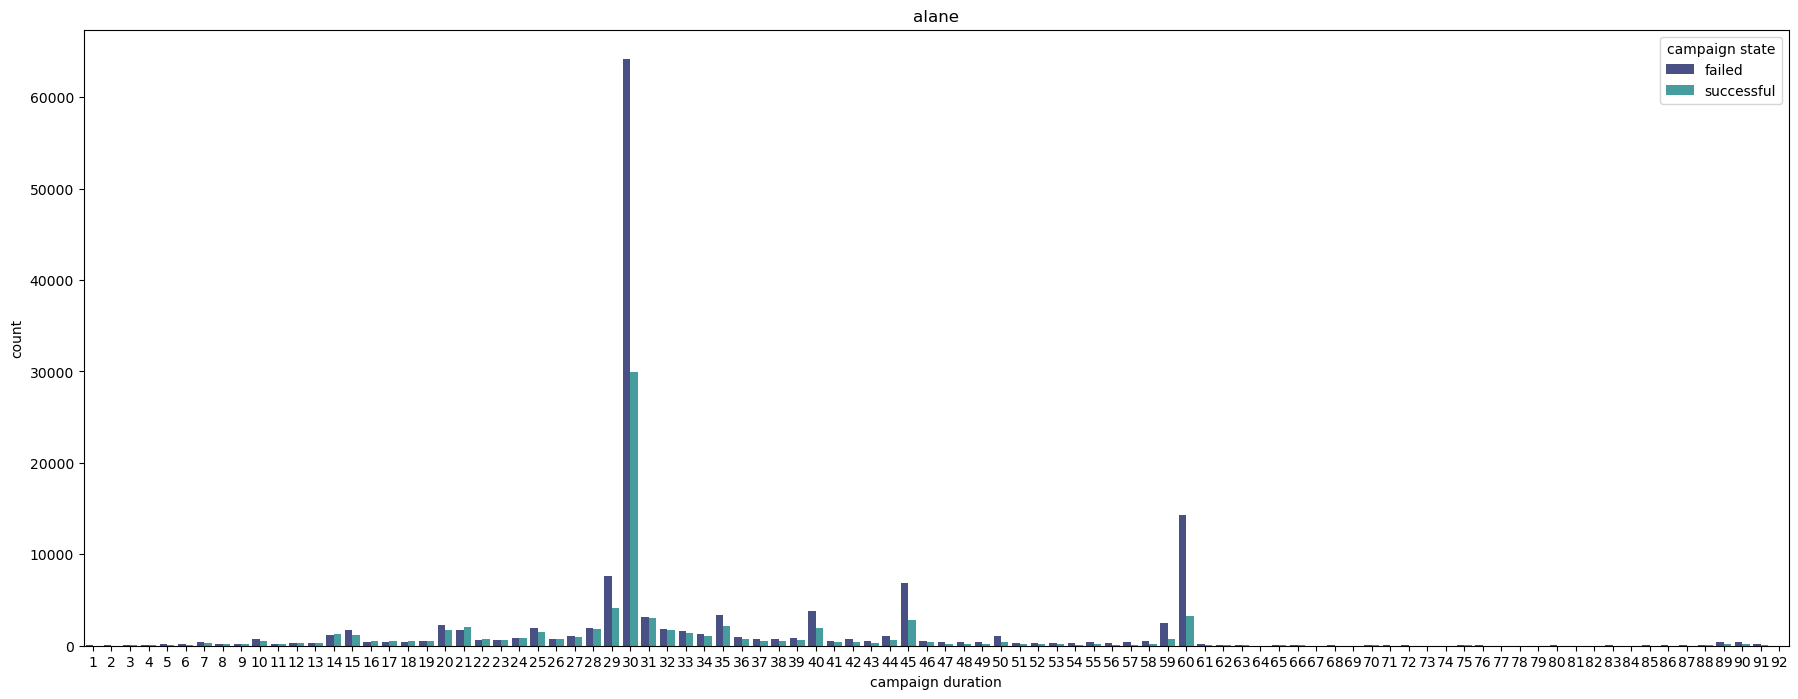

In [ ]:
plt.figure(figsize=(22,8))
plt.title('alane')
order = sorted(df['campaign duration'].unique())
sns.countplot(x='campaign duration', data=df, order=order, palette='mako', hue='campaign state');

Nous remarquons que les durées comprises entre [20,50] jours ont plus de chances que leur campagnes réussissent ce qui pourrait amener les promoteurs de projet à optimiser les durées de leurs campagnes pour maximiser leurs chances de succès

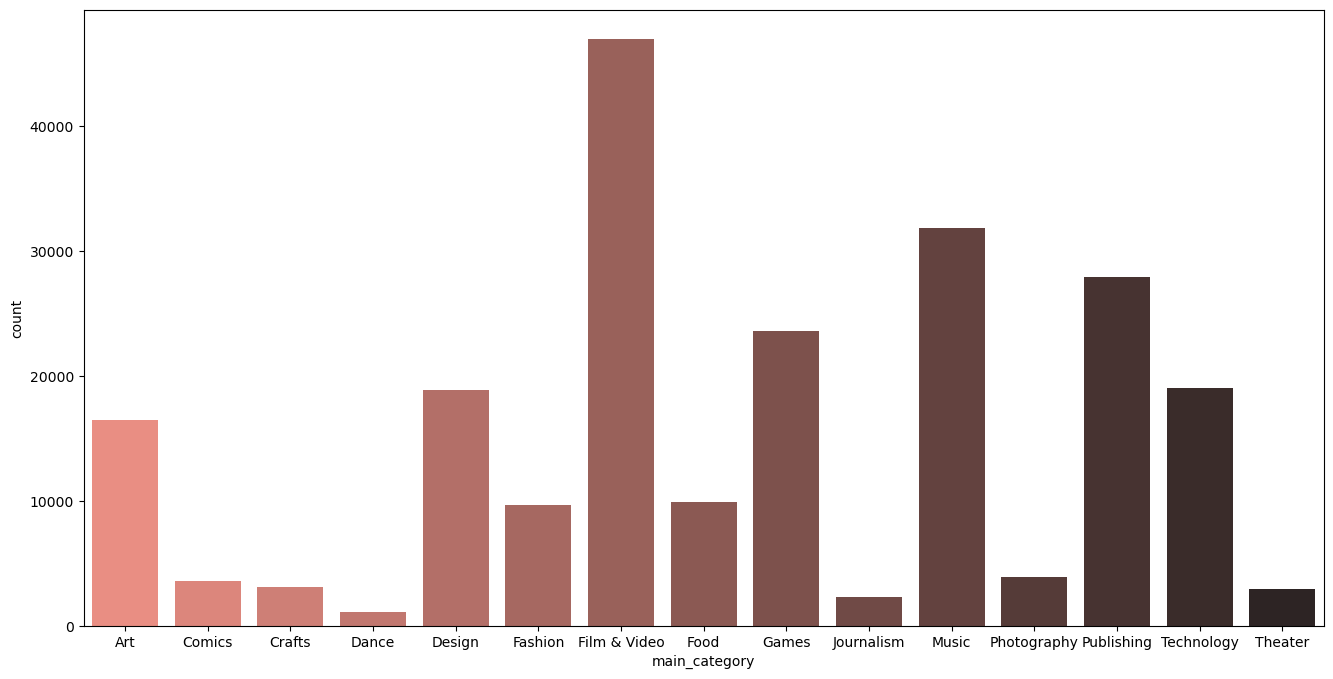

In [ ]:
# Graphique de comptage par categorie principale (main category)
plt.figure(figsize=(16,8))
category_order = sorted(df['main_category'].unique())
sns.countplot(x='main_category', data=df, order=category_order, palette='dark:salmon_r');

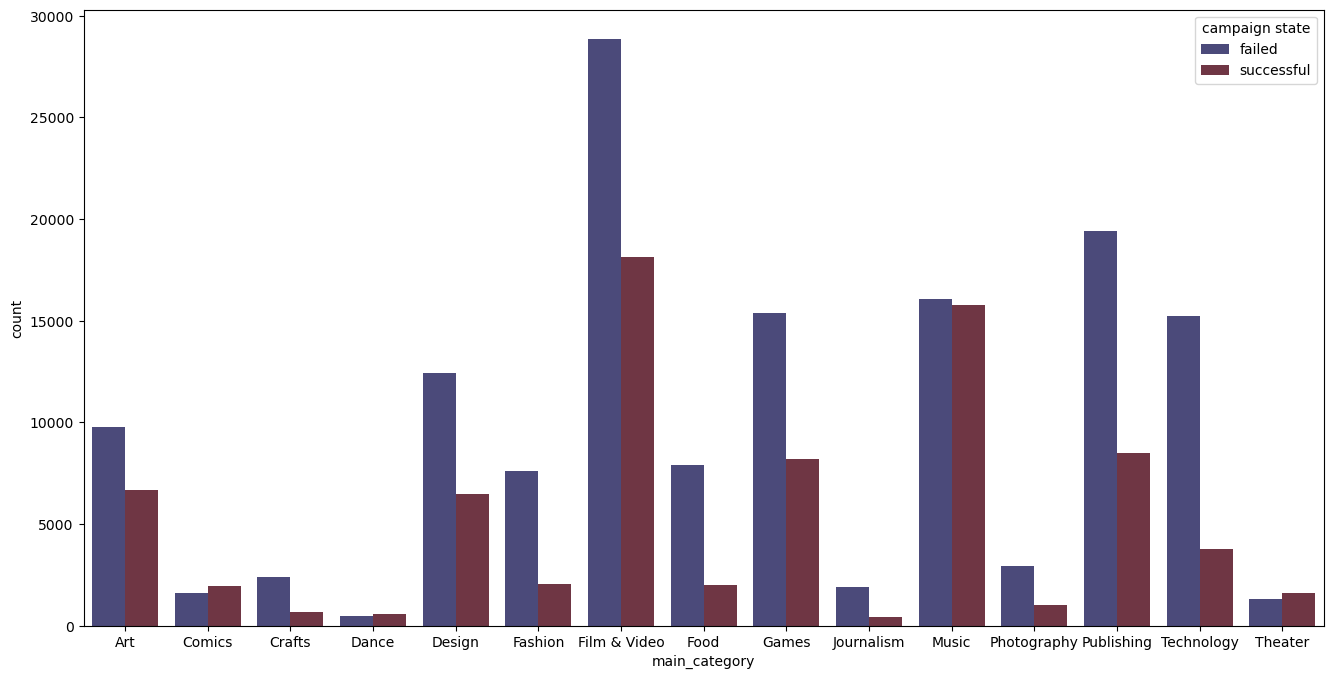

In [ ]:
plt.figure(figsize=(16,8))
category_order = sorted(df['main_category'].unique())
sns.countplot(x='main_category', data=df, order=category_order, palette='icefire', hue='campaign state');

# DEUXIEME INSIGHT

Les campagnes de certaines catégories principales (theater, comics, dance, music, art, Film & Video) ont plus de chances de succès que les autres. Le promoteur de projet peut orienter ses campagnes vers ces catégories pour augmenter leurs chances de réussite

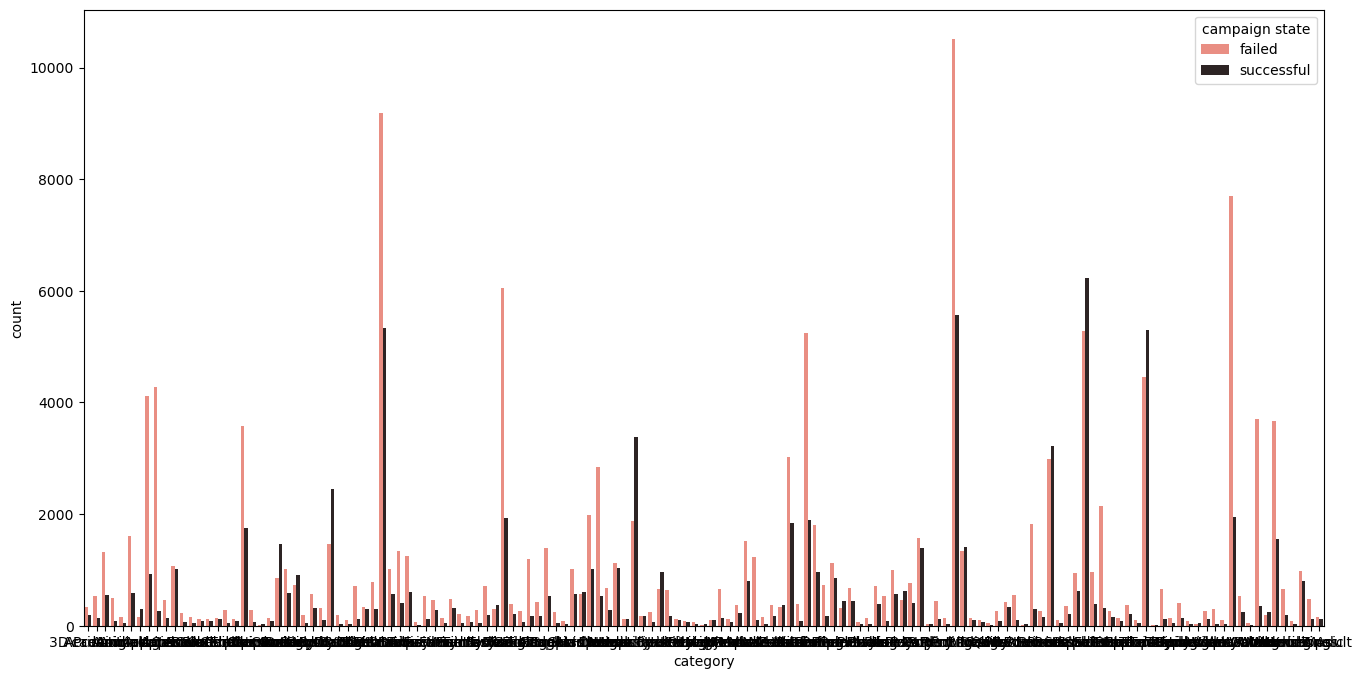

In [ ]:
# Graphique de comptage par sous-categorie principale (category)
plt.figure(figsize=(16,8))
category_order = sorted(df['category'].unique())
sns.countplot(x='category', data=df, order=category_order, palette='dark:salmon_r', hue='campaign state');

NOUS NE POUVONS PAS VISUALISER GRAPHIQUEMENT LES SOUS-CATEGORIES DE PROJET QUI ONT UNE PROBABILITE DE REUSSITE DE CAMPAGNE PLUS ELEVEE A CAUSE DU NOMBRE DE SOUS-CATEGORIE

In [ ]:
pd.set_option('display.max_rows', None)
result = df.groupby(['category','campaign state']).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(result)

               category campaign state  count
200      Product Design         failed  10511
68          Documentary         failed   9184
264         Video Games         failed   7696
231              Shorts     successful   6238
96              Fiction         failed   6050
201      Product Design     successful   5567
69          Documentary     successful   5338
245      Tabletop Games     successful   5292
230              Shorts         failed   5286
166          Nonfiction         failed   5249
244      Tabletop Games         failed   4449
16                 Apps         failed   4272
14              Apparel         failed   4123
270                 Web         failed   3699
274           Webseries         failed   3659
36     Children's Books         failed   3587
127          Indie Rock     successful   3373
223                Rock     successful   3223
162      Narrative Film         failed   3027
222                Rock         failed   2988
118             Hip-Hop         fa

In [ ]:
df[df['category'] == 'Shorts']

category main_category currency          goal    pledged       state  \
86       Shorts  Film & Video      USD  3.000000e+03    3755.00  successful   
159      Shorts  Film & Video      USD  5.000000e+03    5120.00  successful   
170      Shorts  Film & Video      USD  8.000000e+02     850.00  successful   
182      Shorts  Film & Video      USD  5.000000e+02       5.00      failed   
288      Shorts  Film & Video      AUD  2.500000e+02     842.00  successful   
294      Shorts  Film & Video      CAD  7.500000e+03    8422.00  successful   
326      Shorts  Film & Video      USD  8.000000e+02    1072.00  successful   
333      Shorts  Film & Video      USD  5.000000e+02     600.00  successful   
342      Shorts  Film & Video      USD  2.500000e+04   25712.00  successful   
346      Shorts  Film & Video      USD  7.500000e+02     865.00  successful   
357      Shorts  Film & Video      USD  7.500000e+03    8294.63  successful   
368      Shorts  Film & Video      USD  3.000000e+03     165.00      failed   
376      Shorts  Film & Video      USD  6.000000e+02      10.00    canceled   
401      Shorts  Film & Video      USD  6.000000e+02      10.00      failed   
445      Shorts  Film & Video      USD  3.000000e+03       0.00      failed   
449      Shorts  Film & Video      GBP  3.000000e+03    3396.00  successful   
485      Shorts  Film & Video      USD  1.500000e+03       0.00      failed   
497      Shorts  Film & Video      USD  1.000000e+03      10.00      failed   
548      Shorts  Film & Video      USD  1.400000e+03    1405.00  successful   
557      Shorts  Film & Video      USD  4.500000e+03       0.00    canceled   
597      Shorts  Film & Video      USD  3.000000e+03     265.00      failed   
619      Shorts  Film & Video      USD  1.000000e+04    1050.00      failed   
631      Shorts  Film & Video      USD  5.000000e+03    5002.00  successful   
660      Shorts  Film & Video      USD  4.000000e+03     200.00      failed   
701      Shorts  Film & Video      USD  1.500000e+03     376.00      failed   
793      Shorts  Film & Video      USD  1.000000e+04       0.00    canceled   
794      Shorts  Film & Video      USD  1.000000e+04   11610.00  successful   
796      Shorts  Film & Video      USD  2.000000e+04    3355.00      failed   
817      Shorts  Film & Video      USD  3.000000e+03      55.00    canceled   
835      Shorts  Film & Video      USD  4.500000e+03       0.00      failed   
862      Shorts  Film & Video      USD  1.600000e+03    1760.00  successful   
904      Shorts  Film & Video      USD  5.000000e+03    5350.51  successful   
993      Shorts  Film & Video      USD  5.000000e+03    1367.00      failed   
1047     Shorts  Film & Video      USD  7.500000e+03   11026.00  successful   
1057     Shorts  Film & Video      USD  1.200000e+03     315.00    canceled   
1070     Shorts  Film & Video      USD  1.500000e+03      30.00      failed   
1079     Shorts  Film & Video      USD  5.950000e+03    6035.00  successful   
1099     Shorts  Film & Video      USD  1.500000e+03     340.00      failed   
1102     Shorts  Film & Video      USD  2.500000e+04   30255.00  successful   
1104     Shorts  Film & Video      AUD  6.500000e+03    7672.00  successful   
1106     Shorts  Film & Video      USD  1.000000e+03    1227.01  successful   
1114     Shorts  Film & Video      USD  1.000000e+03     100.00      failed   
1170     Shorts  Film & Video      GBP  4.200000e+03     170.00      failed   
1198     Shorts  Film & Video      USD  3.000000e+04    4666.00      failed   
1233     Shorts  Film & Video      USD  4.000000e+03    1145.00      failed   
1338     Shorts  Film & Video      USD  7.500000e+03    8852.89  successful   
1411     Shorts  Film & Video      USD  3.500000e+03    4000.00  successful   
1429     Shorts  Film & Video      USD  2.500000e+02     340.00  successful   
1450     Shorts  Film & Video      GBP  1.000000e+02     164.50  successful   
1457     Shorts  Film & Video      USD  4.300000e+03    4

# TROISIEME INSIGHT

Nous remarquons que les projets ayant comme sous-categorie Shorts de la catégorie principale Film & Video sont ceux qui ont le pourcentage de réussite de campagne le plus élevé parmi tous les autres projets ce qui pourrait suggérer aux promoteurs de lancer plus des campagnes de categories principales Film&Video et de sous-catégories Shorts

VISUALISONS EGALEMENT LES SOUS-CATEGORIES DE PROJET QUI ONT LES PROBABILITES DE REUSSITE DE REALISATION LES PLUS ELEVEES

In [ ]:
result = df.groupby(['category','state']).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(result)

               category       state  count
486      Product Design      failed   8120
163         Documentary      failed   7736
559              Shorts  successful   6226
638         Video Games      failed   5640
488      Product Design  successful   5420
165         Documentary  successful   5327
594      Tabletop Games  successful   5203
232             Fiction      failed   5129
404          Nonfiction      failed   4464
557              Shorts      failed   4415
40                 Apps      failed   3467
35              Apparel      failed   3403
309          Indie Rock  successful   3371
539                Rock  successful   3215
87     Children's Books      failed   3141
662           Webseries      failed   3101
653                 Web      failed   2987
592      Tabletop Games      failed   2875
537                Rock      failed   2526
394      Narrative Film      failed   2489
136      Country & Folk  successful   2445
287             Hip-Hop      failed   2444
485      Pr

Nous observons également que les projets ayant la sous-catégorie Shorts ont plus de chance de se réaliser après leur financement que les autres

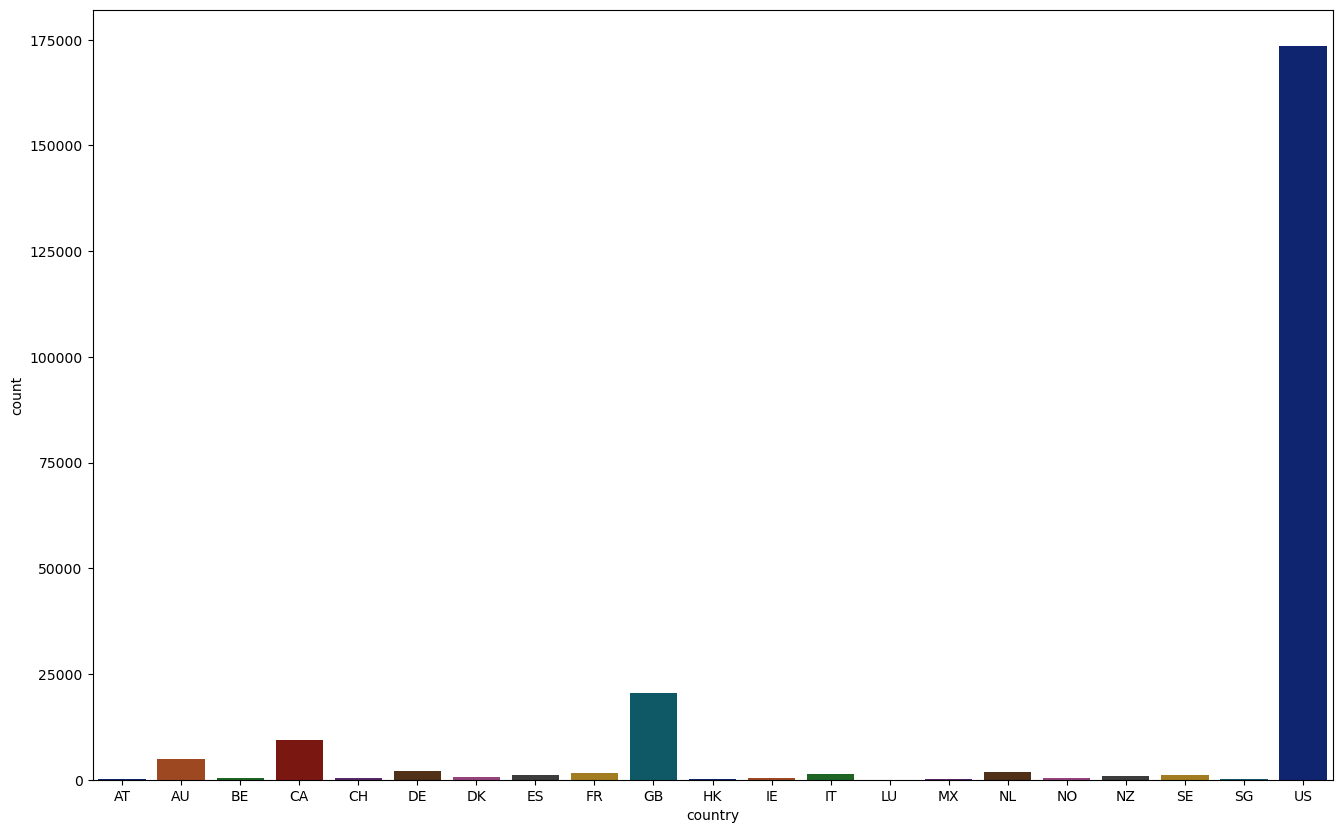

In [ ]:
# Graphique de comptage par pays (country)
plt.figure(figsize=(16,10))
subgrade_order = sorted(df['country'].unique())
sns.countplot(x='country', data=df, order=subgrade_order, palette='dark');

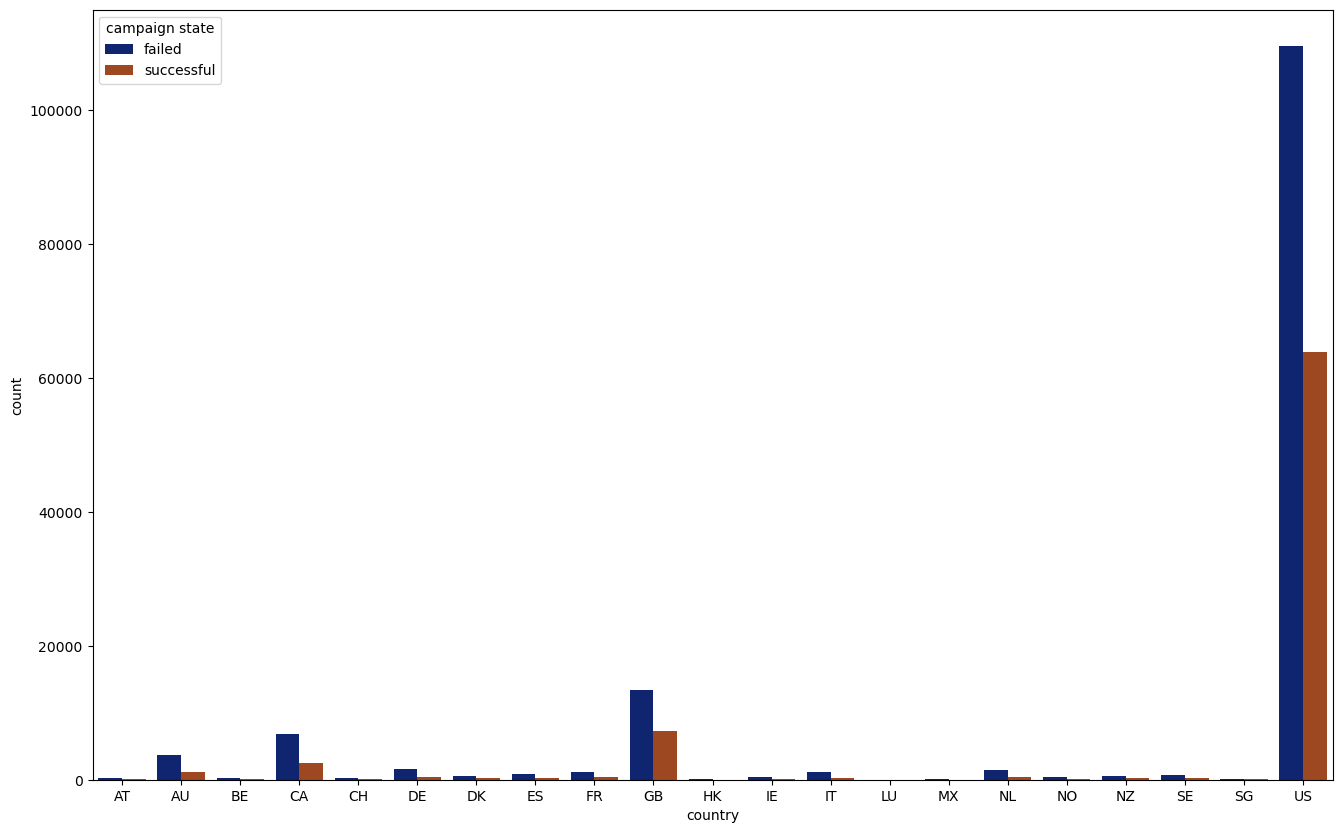

In [ ]:
# Graphique de comptage des pays associé à leur état de campagne des projets
plt.figure(figsize=(16,10))
country_order = sorted(df['country'].unique())
sns.countplot(x='country', data=df, order=country_order, palette='dark', hue='campaign state');

# QUATRIEME INSIGHT

Nous remarquons que les projets ayant comme pays d'origine les états unis (US), malgré qu'ils aient un pourcentage d'echec de campagne élevé, ont le pourcentage de réussite de campagne le plus élevé. Ainsi les promoteurs pourront lancer des campagnes  ayant essentielement les états unis (US) comme pays d'origine de projet.

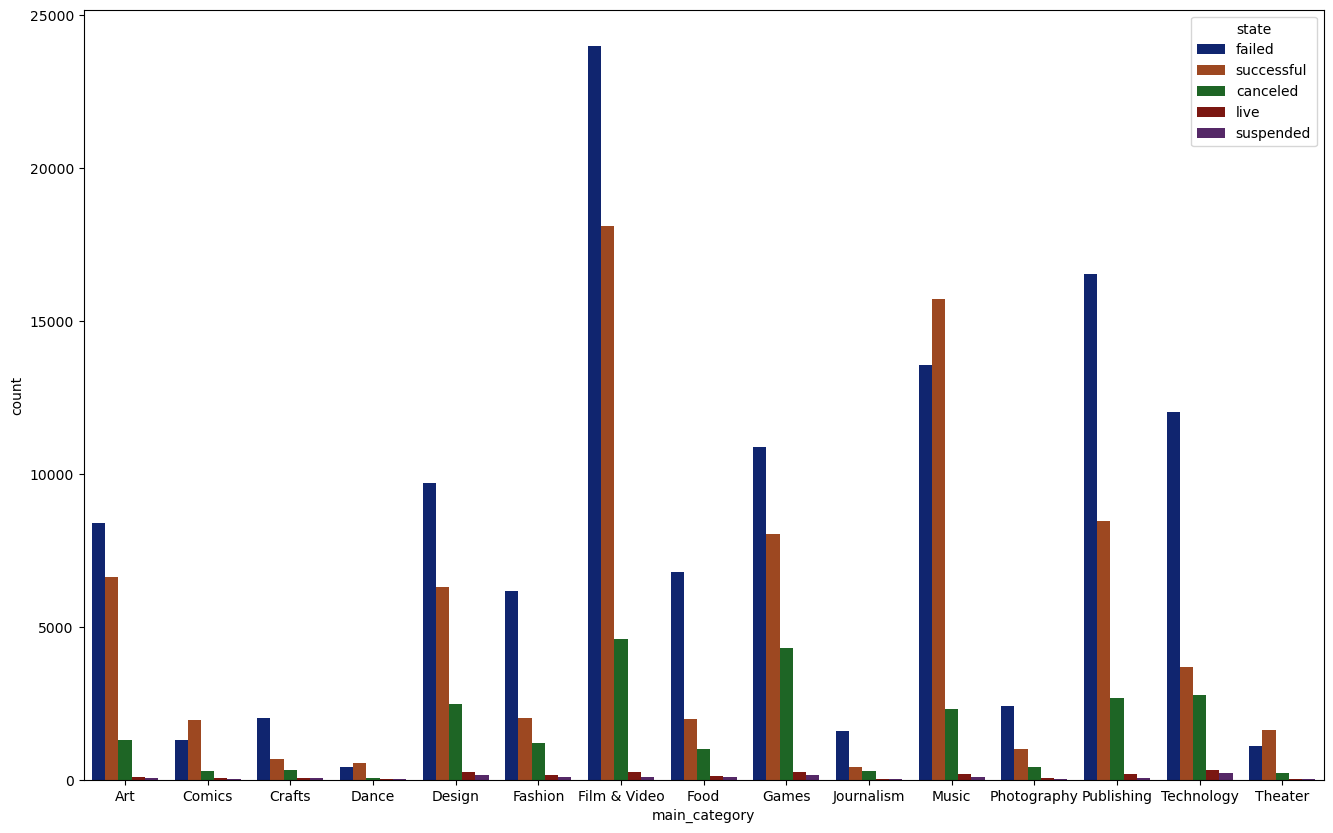

In [ ]:
plt.figure(figsize=(16,10))
country_order = sorted(df['main_category'].unique())
sns.countplot(x='main_category', data=df, order=country_order, palette='dark', hue='state');

En analysant les features main_category et state le promoteur de projet peut facilement réperer les catégories de projets à fort potentiel de réussite de réalisation (Music, Theater, Film&Video...)

# 2.2 : DISCUTONS DES VARIABLES DE CONFUSIONS

Déjà, j'ai repéré ici la variable state (état du projet) comme variable de confusion
Dans mon analyse, la variable state ici sert essentiellement à voir l'état final des différents projets du point de vue réalisation et non point de vue campagne, ce qui pourrait fausser l'analyse et la variable cible (target) du projet

# 2.3 : Comment ces insights peuvent etre transformes en variable pour faciliter l'apprentissage d'un modèle ML ?

En faisant du feature engineering (Nous pouvons combiner ou transformer les variables existantes pour créer de nouvelles variables qui capturent les insights). Par exemple, j'ai fais du feature engineering sur les variables launched et deadline pour en ressortir la durée de la campagne (campaign duration), et aussi sur les variables goal et pledged pour ressortir l'état de la campagne (campaign state)

In [ ]:
# listons toutes les colonnes qui sont actuellement non numériques
df.select_dtypes(['object']).columns

Index(['category', 'main_category', 'currency', 'state', 'country',
       'campaign state'],
      dtype='object')

In [ ]:
# Transformons les valeurs de la colonne campaign state (failed:0, successful:1)
df['campaign state'] = df['campaign state'].map({'failed':0,'successful':1})

C:\Users\Alane Bryan\AppData\Local\Temp\ipykernel_11092\3650531052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['campaign state'] = df['campaign state'].map({'failed':0,'successful':1})


In [ ]:
df.columns

Index(['category', 'main_category', 'currency', 'goal', 'pledged', 'state',
       'backers', 'country', 'usd pledged', 'campaign duration',
       'campaign state'],
      dtype='object')

Supprimons les colonnes 'pledged', 'state', 'backers', 'usd pledged' car nous ne pouvons savoir à l'avance le montant des contributions, l'état final du projet et le nombre de contributeurs

In [ ]:
df = df.drop(['pledged', 'state', 'backers', 'usd pledged'], axis=1)

Puisque les taux de changes de monnaies varient très souvent, il est inutile d'essayer de trouver les equivalents des monnaies (...---> US) et donc je trouve préférable de plutot transformer la colonne currency en variables dummies
Concernant les variables state, backers et pledged, nous ne pouvons savoir ni le nombre de contributeurs du projet à l'avance, ni l'état final du projet, ni le montant des contributions. Ces colonnes seront ainsi supprimées

Convertissons main_category, currency, country en variables dummies (variables catégorielles) et concatenons les nouvelles colonnes au dataframe d'origine

In [ ]:
main_category_dummies = pd.get_dummies(df['main_category'],drop_first=True)
category_dummies = pd.get_dummies(df['category'],drop_first=True)
currency_dummies = pd.get_dummies(df['currency'],drop_first=True)
country_dummies = pd.get_dummies(df['country'],drop_first=True)

df = df.drop(['main_category', 'category', 'currency', 'country'], axis=1)
df = pd.concat([df,main_category_dummies, category_dummies, currency_dummies, country_dummies],axis=1)

In [ ]:
df.head(3)

goal  campaign duration  campaign state  Comics  Crafts  Dance  Design  \
0   1000.0                 58               0       0       0      0       0   
1  45000.0                 45               0       0       0      0       0   
4  50000.0                 35               1       0       0      0       0   

   Fashion  Film & Video  Food  ...  IE  IT  LU  MX  NL  NO  NZ  SE  SG  US  
0        0             0     0  ...   0   0   0   0   0   0   0   0   0   0  
1        0             1     0  ...   0   0   0   0   0   0   0   0   0   1  
4        0             0     1  ...   0   0   0   0   0   0   0   0   0   1  

[3 rows x 191 columns]

In [ ]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [24]:
df.shape

(221089, 191)

In [ ]:
df.to_csv('my_cleaned_dataset.csv')

# 3.Modèle ML et Impact Commercial 

# 3.1

Pour prédire le succès des campagnes Kickstarter, nous utiliserons une approche de classification supervisée en utilisant un modèle de réseau de neurones artificiles(ANN)

# PREPARATION DU MODELE

REPARTITION ENTRAINEMENT / TEST

In [25]:
# Importation de train_test_split depuis sklearn
from sklearn.model_selection import train_test_split

In [26]:
# Fixation des variables X et y aux valeurs des features et label
X = df.drop('campaign state',axis=1).values # Les caractéristiques ou variables de prédiction
y = df['campaign state'].values             # Target ou variable cible

In [27]:
# Effectuons une répartition train/val et test avec test_size=0,2 (20% du dataset pour les tests et 80% pour l'entrainement) 
#  et un random_state de 101

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=101)

# Nous utiliserons X_train et y_train pour l'entraînement du modèle,
# X_val et y_val pour l'évaluation du modèle sur les données de validation
# X_test et y_test pour l'évaluation finale du modèle sur les données de test

NORMALISATION DES DONNEES

In [28]:
# Utilisons une mise à l'échelle MinMaxScaler pour normaliser les données de features X_train et X_test.
# Pour qu'il y ait pas de fuite de données, adaptons que sur les données X_train (données d'entrainement)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

CREATION DU MODELE

In [2]:
# Importons les fonctions Keras necessaires

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [68]:
# Eviter le Overfitting du modèle lui appliquant un arret anticipé 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# patience = 10 (permet d'arreter l'entrainement après 10 epochs à compter de celui du début de l'Overfitting
#                pour etre vraiment sur qu'il s'agit d'un sur-apprentissage)

In [3]:
# Construisons un modèle séquentiel qui sera entraîné sur les données du Jeu de données répartis

model = Sequential()


# Couches d'entrées
model.add(Dense(256,  activation='relu'))
# Les couches Dropout aident à réduire l'overfitting en désactivant les neurones de façon aléatoire pendant l'entraînement.
# Ici nous demandons de désactiver aléatoirement 50% des neurones.
model.add(Dropout(0.5))

# Couches cachées
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Couches cachées
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Couches cachées
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Couche de sortie
model.add(Dense(units=1,activation='sigmoid'))

# Compilation du modèle
# Définissons comme fonction de perte du modèle 'binary_crossentropy' car nous sommes dans un problème de 
# classification binaire et comme optimiseur Adam
model.compile(loss='binary_crossentropy', optimizer='adam')

# Modèle entrainé sur google colab par manque de ressources suffisantes sur mon pc et aussi pour éviter les longs temps d'entrainement multiples du modèle

In [78]:
# Adaptons le modèle aux données d'entraînement pour 100 Epochs et lancons l'entrainement

model.fit(x=X_train,
          y=y_train,
          epochs=100,
          validation_data=(X_val, y_val),
          batch_size=256,
          callbacks=[early_stop]
          )

Epoch 1/100
648/648 [==============================] - 9s 12ms/step - loss: 0.6178 - val_loss: 0.5977
Epoch 2/100
648/648 [==============================] - 6s 9ms/step - loss: 0.6020 - val_loss: 0.5939
Epoch 3/100
648/648 [==============================] - 8s 12ms/step - loss: 0.5988 - val_loss: 0.5918
Epoch 4/100
648/648 [==============================] - 6s 9ms/step - loss: 0.5974 - val_loss: 0.5910
Epoch 5/100
648/648 [==============================] - 8s 12ms/step - loss: 0.5964 - val_loss: 0.5909
Epoch 6/100
648/648 [==============================] - 6s 9ms/step - loss: 0.5951 - val_loss: 0.5904
Epoch 7/100
648/648 [==============================] - 8s 12ms/step - loss: 0.5948 - val_loss: 0.5903
Epoch 8/100
648/648 [==============================] - 6s 9ms/step - loss: 0.5936 - val_loss: 0.5900
Epoch 9/100
648/648 [==============================] - 8s 12ms/step - loss: 0.5934 - val_loss: 0.5907
Epoch 10/100
648/648 [==============================] - 6s 9ms/step - loss: 0.5929 - v

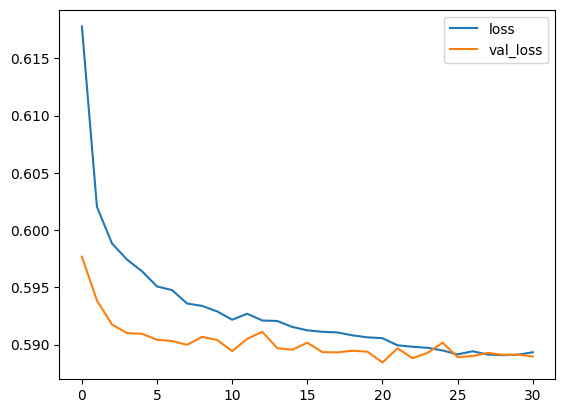

In [79]:
model_loss = pd.DataFrame(model.history.history)
# Graphe de mesure de l'erreur de validation du modèle
model_loss.plot();

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
# Evaluation du modèle sur les données de test
predictions = (model.predict(X_test) > 0.5).astype('int32')

1728/1728 [==============================] - 6s 3ms/step


In [91]:
# Mesure des performances du modèle
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78     35605
           1       0.60      0.35      0.44     19668

    accuracy                           0.69     55273
   macro avg       0.65      0.61      0.61     55273
weighted avg       0.67      0.69      0.66     55273



In [92]:
# Matrice de confusion
confusion_matrix(y_test,predictions)

array([[31030,  4575],
       [12788,  6880]])

In [164]:
# Generation d'une campagne aléatoirement prise dans le jeu de données aléatoirement
import random

random_ind = random.randint(0,len(df))

new_project = df.drop('campaign state',axis=1).iloc[random_ind]
new_project

goal                 14000.0
campaign duration       39.0
Comics                   0.0
Crafts                   0.0
Dance                    0.0
                      ...   
NO                       0.0
NZ                       0.0
SE                       0.0
SG                       0.0
US                       1.0
Name: 66910, Length: 190, dtype: float64

In [165]:
# Mise à l'échelle des données
new_project = scaler.transform(new_project.values.reshape(1,190))

In [166]:
# Prédiction du modèle
(model.predict(new_project) > 0.5).astype('int32')

1/1 [==============================] - 0s 24ms/step


array([[1]], dtype=int32)

In [167]:
# Prédiction réelle
df.iloc[random_ind]['campaign state']

1.0

# 3.2  Comment j'interprètes les résultats produits par ma solution ML(mon modèle) en termes de succès des campagnes ?

Déjà, je ne pouvais pas faire mieux de par la nature du Jeu de données. Précédemment dans l'analyse exploratoire, nous avons bien vu que le jeu de données est déséquilibré avec une forte proportion d'échecs des campagnes. 

Evaluons les performances de mon modèle

Accuracy(exactitude) : Le modèle a comme valeur d'exactitude 69%, valeur proche de 1 ce qui veut dire que le modèle prédit correctement la classe dans la plupart des cas. Néanmoins, nous ne pouvons pas évaluer le modèle sur ce critère parce que les classes cibles ne sont pas bien équilibrés, comme je l'ai dit plutot, le nombre de campagne réussi est largement inférieur à celui des campagnes échouées dans le Jeu de données meme après nettoyage de celui. L'exactitude n'est pas un bon choix avec des classes déséquilibrées.

Precision(Précision) : Le modèle a comme valeurs de précision 71% proche de 0 et 60% proche de 1 ce qui veut que le modèle à une faible probabilité de prédire le succès des campagnes alors qu'en réalités elles ont échoués. Cette mesure est très intéressante si ce n'est l'une des plus importantes dans notre contexte parce que si le modèle arrive à prédire la réussite d'une campagne, alors il y a de fortes chances qu'elle réussisse vraiment.

Recall (Rappel) : Le modèle a comme valeur de rappel 87% la plus proche de 0 ce qui veut dire que le modèle a une forte probabilité de prédire l'échec des campagnes alors qu'en réalité elles auraient pu réussir. Si on reste dans notre contexte, celà ne causera pas de problème. 

F1-score : Le modèle a comme valeur de score 78% (proche de 0) contre 44% (proche de 1) ce qui indique un déséquilibre entre la précision et le rappel et est tout à fait justifié à cause du déséquilibre de classes cibles. 

Matrice de confusion :  [[31030,  4575]
                        [12788,  6880]]

Nous avons 31030 campagnes de données de test qui ont réusi que le modèle a prédit leur réussite, 6880 campagnes de données de test qui ont échoués que le modèle a effectivement prédit leur échec, 4575 campagnes de données de test qui ont réussi mais le modèle a prédit leur echec, 12788 campagnes de données de test qui ont échoué que le modèle a prédit leur réussite

Fin de commpte si le jeu de données était équilibré (chose qui n'était pas necessaire pas et meme interdit parce que le but est de justement proposer un modèle qui pourra s'adapter à ces conditions)

# Comment la solution ajoute-t-elle de la valeur pour les promoteurs de projets sur Kickstarter ?

Pour les promoteurs de projets sur Kickstarter, la solution ajoute de la valeur en leur fournissant des informations prédictives sur les chances de succès d'une campagne avant son lancement. Cela les aidera à prendre des décisions éclairées concernant la planification, le budget et la promotion de leur projet. De plus, en identifiant les facteurs clés qui contribuent au succès d'une campagne, la solution peut fournir des recommandations pour optimiser les éléments tels que la durée de la campagne, le montant cible, la catégorie du projet, la sous-catégorie. Cela permet aux promoteurs de maximiser leurs chances de réussite et de minimiser les risques associés à leur campagne de projet.

# 3.3 Comment j'envisage que les parties prenantes vont utiliser ma solution pour comprendre comment lancer des campagnes à haut taux de succès ? 

Voici quelques exemples d'utilisation dans un contexte commercial :

Sélection des bonnes catégories : La solution peut aider les parties prenantes à identifier les catégories et sous-catégories de projets qui ont tendance à réussir le mieux sur Kickstarter. Par exemple, si la solution indique que les projets liés au théatre et à la danse ou à la technologie ont généralement un taux de succès élevé, les parties prenantes peuvent choisir de se concentrer sur ces catégories pour augmenter leurs chances de réussite.

Détermination du montant cible : La solution peut aider les parties prenantes à déterminer le montant cible optimal (goal) pour leur campagne Kickstarter. En analysant les données historiques et en identifiant les projets similaires ayant réussi par le passé, la solution peut recommander un montant réaliste et atteignable.

Planification de la durée de la campagne : La solution peut analyser la durée des campagnes réussies et suggérer une période optimale pour maximiser les chances de réussite. Par exemple, si la solution constate que les campagnes de 30 jours ont tendance à réussir davantage, les parties prenantes peuvent ajuster la durée de leur campagne en conséquence.

# 4.  Maintenance du Modèle

Si la performance du modèle se dégrade progressivement depuis les derniers mois et que certaines variables ont également évolué, une possible raison pourrait être un changement de comportement ou de dynamique dans les données d'entraînement. Pour résoudre cette situation :

1.J'analyserai les nouvelles données pour comprendre comment elles diffèrent des données précédentes, identifierai les variables qui ont évolué et déterminer si elles sont pertinentes pour la prédiction du succès des campagnes Kickstarter

2.Je réévaluerai les caractéristiques et vérifierai si les caractéristiques utilisées pour entraîner le modèle sont toujours appropriées compte tenu des nouvelles données

3.Si le changement dans les données justifie une mise à jour du modèle, je re-entraînerai le modèle en incluant les nouvelles données et en ajustant les paramètres si nécessaire. Cela permettra de prendre en compte les évolutions récentes et d'améliorer la performance du modèle.

4.Je surveillerai régulièrement le modèle en établissant un processus de surveillance régulière de la performance du modèle afin de détecter rapidement toute dégradation future. Cela peut impliquer la collecte continue de nouvelles données et l'évaluation périodique de la performance du modèle.